# Get Names of Images Including Person

In [1]:
import glob
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import xml.etree.ElementTree as ET

In [113]:
from random import randint
import random

In [2]:
xml_src = glob.glob("../bdd100k/bdd100k/xml/train/*.xml")

In [3]:
num_imgs = 0
person_img_names = []

for xml_path in xml_src:
    
    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            if obj_name == "person": 
                num_imgs += 1
                
                img_basename = os.path.basename(xml_path)
                img_onlyname = os.path.splitext(img_basename)
                person_img_names.append(img_onlyname[0])
                
                break

print(num_imgs)

22076


In [4]:
# Names of Images Including Person: Array: person_img_names
print(person_img_names[0])

70603b9c-242a176f


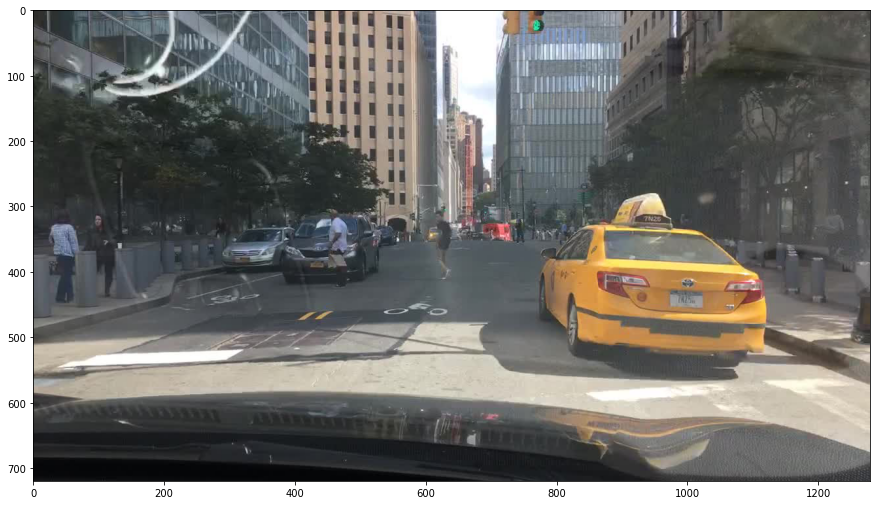

In [14]:
test_img = plt.imread("../bdd100k/bdd100k/images/100k/train/" + person_img_names[randint(0, 1000)] + ".jpg")
plt.figure(figsize = (15, 10))
plt.imshow(test_img)

# Generate Sub Images Including Person and Annotations

In [72]:
# Generate sub-image data
count = 0

sub_names = []
sub_infor = []

for img_name in person_img_names:
    count += 1
    
    img_path = "../bdd100k/bdd100k/images/100k/train/" + img_name + ".jpg"
    xml_path = "../bdd100k/bdd100k/xml/train/" + img_name + ".xml"

    image = cv2.imread(img_path)

    img_info = []
    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            bndbox = obj.find('bndbox')
            left = bndbox.find('xmin').text
            top = bndbox.find('ymin').text
            right = bndbox.find('xmax').text
            bottom = bndbox.find('ymax').text

            img_info.append([obj_name, left, top, right, bottom])

    print("Img", count, "- Num of Objs: ", len(img_info))

    # Innitialize
    new_w = image.shape[1]//2
    new_h = image.shape[0]//2

    # Crop Image
    cropped_img_0 = image[0:new_h, 0:new_w]
    cropped_img_1 = image[0:new_h, image.shape[1]//2:image.shape[1]]
    cropped_img_2 = image[image.shape[0]//2:image.shape[0], 0:new_w]
    cropped_img_3 = image[image.shape[0]//2:image.shape[0], image.shape[1]//2:image.shape[1]]


    # TOP-LEFT
    new_img_info_0 = []

    for obj in img_info:
        x1 = int(obj[1])
        y1 = int(obj[2])
        
        if x1 < new_w and y1 < new_h:
            x2 = int(obj[3])
            y2 = int(obj[4])
            if x2 > new_w: x2 = new_w
            if y2 > new_h: y2 = new_h

            new_img_info_0.append([obj[0], x1, y1, x2, y2])

    # TOP-RIGHT
    new_img_info_1 = []

    for obj in img_info:
        x1 = int(obj[1]) - new_w
        x2 = int(obj[3]) - new_w
        y1 = int(obj[2])

        if x2 > 0 and y1 < new_h:
            if x1 < 0: x1 = 0
            y2 = int(obj[4])
            if y2 > new_h: y2 = new_h

            new_img_info_1.append([obj[0], x1, y1, x2, y2])

    # BOTTOM-LEFT
    new_img_info_2 = []

    for obj in img_info:
        y1 = int(obj[2]) - new_h
        y2 = int(obj[4]) - new_h
        x1 = int(obj[1])

        if y2 > 0 and x1 < new_w:
            if y1 < 0: y1 = 0
            x2 = int(obj[3])
            if x2 > new_w: x2 = new_w

            new_img_info_2.append([obj[0], x1, y1, x2, y2])

    # BOTTOM-RIGHT
    new_img_info_3 = []

    for obj in img_info:
        x1 = int(obj[1]) - new_w
        y1 = int(obj[2]) - new_h
        x2 = int(obj[3]) - new_w
        y2 = int(obj[4]) - new_h

        if x2 > 0 and y2 > 0:
            if x1 < 0: x1 = 0
            if y1 < 0: y1 = 0

            new_img_info_3.append([obj[0], x1, y1, x2, y2])

    for infor_i in new_img_info_0:
        if infor_i[0] == "person":
            # Write Image
            cv2.imwrite("./sub-images/" + img_name + "_0.jpg", cropped_img_0)
            
            # Write Text
            text_file = open("./sub-annotations/" + img_name + "_0.txt", "w+")
            for infor in new_img_info_0: 
                if infor[0] == "traffic light": infor[0] = "traffic_light"
                if infor[0] == "traffic sign": infor[0] = "traffic_sign"
                print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
            text_file.close()
            
            break
            
    for infor_i in new_img_info_1:
        if infor_i[0] == "person":
            # Write Image
            cv2.imwrite("./sub-images/" + img_name + "_1.jpg", cropped_img_1)
            
            # Write Text
            text_file = open("./sub-annotations/" + img_name + "_1.txt", "w+")
            for infor in new_img_info_1: 
                if infor[0] == "traffic light": infor[0] = "traffic_light"
                if infor[0] == "traffic sign": infor[0] = "traffic_sign"
                print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
            text_file.close()
            
            break
            
    for infor_i in new_img_info_2:
        if infor_i[0] == "person":
            # Write Image
            cv2.imwrite("./sub-images/" + img_name + "_2.jpg", cropped_img_2)
            
            # Write Text
            text_file = open("./sub-annotations/" + img_name + "_2.txt", "w+")
            for infor in new_img_info_2: 
                if infor[0] == "traffic light": infor[0] = "traffic_light"
                if infor[0] == "traffic sign": infor[0] = "traffic_sign"
                print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
            text_file.close()
            
            break
            
    for infor_i in new_img_info_3:
        if infor_i[0] == "person":
            # Write Image
            cv2.imwrite("./sub-images/" + img_name + "_3.jpg", cropped_img_3)
            
            # Write Text
            text_file = open("./sub-annotations/" + img_name + "_3.txt", "w+")
            for infor in new_img_info_3: 
                if infor[0] == "traffic light": infor[0] = "traffic_light"
                if infor[0] == "traffic sign": infor[0] = "traffic_sign"
                print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
            text_file.close()
            
            break
    
    # if count == 10: break
    
print(count)

Img 1 - Num of Objs:  21
Img 2 - Num of Objs:  18
Img 3 - Num of Objs:  47
Img 4 - Num of Objs:  34
Img 5 - Num of Objs:  23
Img 6 - Num of Objs:  25
Img 7 - Num of Objs:  33
Img 8 - Num of Objs:  20
Img 9 - Num of Objs:  35
Img 10 - Num of Objs:  44
Img 11 - Num of Objs:  34
Img 12 - Num of Objs:  23
Img 13 - Num of Objs:  19
Img 14 - Num of Objs:  18
Img 15 - Num of Objs:  11
Img 16 - Num of Objs:  17
Img 17 - Num of Objs:  26
Img 18 - Num of Objs:  35
Img 19 - Num of Objs:  23
Img 20 - Num of Objs:  32
Img 21 - Num of Objs:  22
Img 22 - Num of Objs:  31
Img 23 - Num of Objs:  13
Img 24 - Num of Objs:  59
Img 25 - Num of Objs:  7
Img 26 - Num of Objs:  24
Img 27 - Num of Objs:  23
Img 28 - Num of Objs:  16
Img 29 - Num of Objs:  19
Img 30 - Num of Objs:  23
Img 31 - Num of Objs:  25
Img 32 - Num of Objs:  29
Img 33 - Num of Objs:  27
Img 34 - Num of Objs:  39
Img 35 - Num of Objs:  30
Img 36 - Num of Objs:  5
Img 37 - Num of Objs:  23
Img 38 - Num of Objs:  21
Img 39 - Num of Objs:  

Img 310 - Num of Objs:  26
Img 311 - Num of Objs:  10
Img 312 - Num of Objs:  29
Img 313 - Num of Objs:  26
Img 314 - Num of Objs:  24
Img 315 - Num of Objs:  5
Img 316 - Num of Objs:  29
Img 317 - Num of Objs:  17
Img 318 - Num of Objs:  26
Img 319 - Num of Objs:  13
Img 320 - Num of Objs:  16
Img 321 - Num of Objs:  29
Img 322 - Num of Objs:  33
Img 323 - Num of Objs:  20
Img 324 - Num of Objs:  20
Img 325 - Num of Objs:  19
Img 326 - Num of Objs:  27
Img 327 - Num of Objs:  33
Img 328 - Num of Objs:  22
Img 329 - Num of Objs:  10
Img 330 - Num of Objs:  14
Img 331 - Num of Objs:  16
Img 332 - Num of Objs:  29
Img 333 - Num of Objs:  7
Img 334 - Num of Objs:  21
Img 335 - Num of Objs:  21
Img 336 - Num of Objs:  30
Img 337 - Num of Objs:  23
Img 338 - Num of Objs:  19
Img 339 - Num of Objs:  23
Img 340 - Num of Objs:  25
Img 341 - Num of Objs:  52
Img 342 - Num of Objs:  22
Img 343 - Num of Objs:  24
Img 344 - Num of Objs:  20
Img 345 - Num of Objs:  10
Img 346 - Num of Objs:  35
Img

Img 618 - Num of Objs:  23
Img 619 - Num of Objs:  25
Img 620 - Num of Objs:  12
Img 621 - Num of Objs:  7
Img 622 - Num of Objs:  16
Img 623 - Num of Objs:  19
Img 624 - Num of Objs:  27
Img 625 - Num of Objs:  8
Img 626 - Num of Objs:  27
Img 627 - Num of Objs:  26
Img 628 - Num of Objs:  15
Img 629 - Num of Objs:  8
Img 630 - Num of Objs:  18
Img 631 - Num of Objs:  39
Img 632 - Num of Objs:  22
Img 633 - Num of Objs:  19
Img 634 - Num of Objs:  26
Img 635 - Num of Objs:  29
Img 636 - Num of Objs:  24
Img 637 - Num of Objs:  33
Img 638 - Num of Objs:  27
Img 639 - Num of Objs:  25
Img 640 - Num of Objs:  10
Img 641 - Num of Objs:  18
Img 642 - Num of Objs:  16
Img 643 - Num of Objs:  5
Img 644 - Num of Objs:  11
Img 645 - Num of Objs:  21
Img 646 - Num of Objs:  23
Img 647 - Num of Objs:  16
Img 648 - Num of Objs:  27
Img 649 - Num of Objs:  15
Img 650 - Num of Objs:  16
Img 651 - Num of Objs:  16
Img 652 - Num of Objs:  25
Img 653 - Num of Objs:  56
Img 654 - Num of Objs:  11
Img 6

Img 929 - Num of Objs:  30
Img 930 - Num of Objs:  14
Img 931 - Num of Objs:  33
Img 932 - Num of Objs:  21
Img 933 - Num of Objs:  6
Img 934 - Num of Objs:  29
Img 935 - Num of Objs:  32
Img 936 - Num of Objs:  22
Img 937 - Num of Objs:  7
Img 938 - Num of Objs:  30
Img 939 - Num of Objs:  13
Img 940 - Num of Objs:  32
Img 941 - Num of Objs:  15
Img 942 - Num of Objs:  36
Img 943 - Num of Objs:  25
Img 944 - Num of Objs:  8
Img 945 - Num of Objs:  10
Img 946 - Num of Objs:  11
Img 947 - Num of Objs:  42
Img 948 - Num of Objs:  17
Img 949 - Num of Objs:  5
Img 950 - Num of Objs:  27
Img 951 - Num of Objs:  43
Img 952 - Num of Objs:  37
Img 953 - Num of Objs:  11
Img 954 - Num of Objs:  53
Img 955 - Num of Objs:  28
Img 956 - Num of Objs:  36
Img 957 - Num of Objs:  24
Img 958 - Num of Objs:  19
Img 959 - Num of Objs:  33
Img 960 - Num of Objs:  27
Img 961 - Num of Objs:  25
Img 962 - Num of Objs:  35
Img 963 - Num of Objs:  16
Img 964 - Num of Objs:  16
Img 965 - Num of Objs:  26
Img 9

Img 1229 - Num of Objs:  26
Img 1230 - Num of Objs:  39
Img 1231 - Num of Objs:  24
Img 1232 - Num of Objs:  34
Img 1233 - Num of Objs:  13
Img 1234 - Num of Objs:  13
Img 1235 - Num of Objs:  28
Img 1236 - Num of Objs:  26
Img 1237 - Num of Objs:  44
Img 1238 - Num of Objs:  15
Img 1239 - Num of Objs:  26
Img 1240 - Num of Objs:  48
Img 1241 - Num of Objs:  16
Img 1242 - Num of Objs:  24
Img 1243 - Num of Objs:  21
Img 1244 - Num of Objs:  13
Img 1245 - Num of Objs:  36
Img 1246 - Num of Objs:  50
Img 1247 - Num of Objs:  14
Img 1248 - Num of Objs:  13
Img 1249 - Num of Objs:  34
Img 1250 - Num of Objs:  33
Img 1251 - Num of Objs:  41
Img 1252 - Num of Objs:  16
Img 1253 - Num of Objs:  21
Img 1254 - Num of Objs:  42
Img 1255 - Num of Objs:  21
Img 1256 - Num of Objs:  22
Img 1257 - Num of Objs:  28
Img 1258 - Num of Objs:  24
Img 1259 - Num of Objs:  26
Img 1260 - Num of Objs:  15
Img 1261 - Num of Objs:  42
Img 1262 - Num of Objs:  6
Img 1263 - Num of Objs:  30
Img 1264 - Num of Obj

Img 1534 - Num of Objs:  38
Img 1535 - Num of Objs:  16
Img 1536 - Num of Objs:  13
Img 1537 - Num of Objs:  7
Img 1538 - Num of Objs:  22
Img 1539 - Num of Objs:  40
Img 1540 - Num of Objs:  18
Img 1541 - Num of Objs:  21
Img 1542 - Num of Objs:  53
Img 1543 - Num of Objs:  27
Img 1544 - Num of Objs:  24
Img 1545 - Num of Objs:  38
Img 1546 - Num of Objs:  17
Img 1547 - Num of Objs:  33
Img 1548 - Num of Objs:  32
Img 1549 - Num of Objs:  8
Img 1550 - Num of Objs:  20
Img 1551 - Num of Objs:  14
Img 1552 - Num of Objs:  8
Img 1553 - Num of Objs:  9
Img 1554 - Num of Objs:  39
Img 1555 - Num of Objs:  18
Img 1556 - Num of Objs:  47
Img 1557 - Num of Objs:  28
Img 1558 - Num of Objs:  15
Img 1559 - Num of Objs:  38
Img 1560 - Num of Objs:  19
Img 1561 - Num of Objs:  25
Img 1562 - Num of Objs:  30
Img 1563 - Num of Objs:  24
Img 1564 - Num of Objs:  27
Img 1565 - Num of Objs:  22
Img 1566 - Num of Objs:  24
Img 1567 - Num of Objs:  25
Img 1568 - Num of Objs:  7
Img 1569 - Num of Objs:  

Img 1830 - Num of Objs:  31
Img 1831 - Num of Objs:  14
Img 1832 - Num of Objs:  8
Img 1833 - Num of Objs:  28
Img 1834 - Num of Objs:  37
Img 1835 - Num of Objs:  20
Img 1836 - Num of Objs:  24
Img 1837 - Num of Objs:  42
Img 1838 - Num of Objs:  13
Img 1839 - Num of Objs:  20
Img 1840 - Num of Objs:  13
Img 1841 - Num of Objs:  37
Img 1842 - Num of Objs:  20
Img 1843 - Num of Objs:  18
Img 1844 - Num of Objs:  17
Img 1845 - Num of Objs:  20
Img 1846 - Num of Objs:  20
Img 1847 - Num of Objs:  22
Img 1848 - Num of Objs:  68
Img 1849 - Num of Objs:  18
Img 1850 - Num of Objs:  32
Img 1851 - Num of Objs:  16
Img 1852 - Num of Objs:  66
Img 1853 - Num of Objs:  15
Img 1854 - Num of Objs:  7
Img 1855 - Num of Objs:  16
Img 1856 - Num of Objs:  6
Img 1857 - Num of Objs:  37
Img 1858 - Num of Objs:  12
Img 1859 - Num of Objs:  39
Img 1860 - Num of Objs:  19
Img 1861 - Num of Objs:  25
Img 1862 - Num of Objs:  31
Img 1863 - Num of Objs:  41
Img 1864 - Num of Objs:  28
Img 1865 - Num of Objs:

Img 2126 - Num of Objs:  31
Img 2127 - Num of Objs:  27
Img 2128 - Num of Objs:  10
Img 2129 - Num of Objs:  22
Img 2130 - Num of Objs:  8
Img 2131 - Num of Objs:  27
Img 2132 - Num of Objs:  54
Img 2133 - Num of Objs:  12
Img 2134 - Num of Objs:  4
Img 2135 - Num of Objs:  32
Img 2136 - Num of Objs:  28
Img 2137 - Num of Objs:  23
Img 2138 - Num of Objs:  11
Img 2139 - Num of Objs:  25
Img 2140 - Num of Objs:  28
Img 2141 - Num of Objs:  23
Img 2142 - Num of Objs:  22
Img 2143 - Num of Objs:  39
Img 2144 - Num of Objs:  28
Img 2145 - Num of Objs:  18
Img 2146 - Num of Objs:  10
Img 2147 - Num of Objs:  15
Img 2148 - Num of Objs:  19
Img 2149 - Num of Objs:  11
Img 2150 - Num of Objs:  9
Img 2151 - Num of Objs:  19
Img 2152 - Num of Objs:  6
Img 2153 - Num of Objs:  33
Img 2154 - Num of Objs:  15
Img 2155 - Num of Objs:  4
Img 2156 - Num of Objs:  14
Img 2157 - Num of Objs:  27
Img 2158 - Num of Objs:  22
Img 2159 - Num of Objs:  32
Img 2160 - Num of Objs:  9
Img 2161 - Num of Objs:  1

Img 2431 - Num of Objs:  27
Img 2432 - Num of Objs:  22
Img 2433 - Num of Objs:  21
Img 2434 - Num of Objs:  25
Img 2435 - Num of Objs:  22
Img 2436 - Num of Objs:  33
Img 2437 - Num of Objs:  9
Img 2438 - Num of Objs:  11
Img 2439 - Num of Objs:  32
Img 2440 - Num of Objs:  25
Img 2441 - Num of Objs:  20
Img 2442 - Num of Objs:  24
Img 2443 - Num of Objs:  27
Img 2444 - Num of Objs:  31
Img 2445 - Num of Objs:  27
Img 2446 - Num of Objs:  40
Img 2447 - Num of Objs:  21
Img 2448 - Num of Objs:  11
Img 2449 - Num of Objs:  23
Img 2450 - Num of Objs:  37
Img 2451 - Num of Objs:  37
Img 2452 - Num of Objs:  37
Img 2453 - Num of Objs:  10
Img 2454 - Num of Objs:  41
Img 2455 - Num of Objs:  12
Img 2456 - Num of Objs:  18
Img 2457 - Num of Objs:  6
Img 2458 - Num of Objs:  20
Img 2459 - Num of Objs:  16
Img 2460 - Num of Objs:  15
Img 2461 - Num of Objs:  22
Img 2462 - Num of Objs:  17
Img 2463 - Num of Objs:  31
Img 2464 - Num of Objs:  22
Img 2465 - Num of Objs:  23
Img 2466 - Num of Objs

Img 2729 - Num of Objs:  29
Img 2730 - Num of Objs:  27
Img 2731 - Num of Objs:  24
Img 2732 - Num of Objs:  27
Img 2733 - Num of Objs:  16
Img 2734 - Num of Objs:  11
Img 2735 - Num of Objs:  30
Img 2736 - Num of Objs:  26
Img 2737 - Num of Objs:  18
Img 2738 - Num of Objs:  17
Img 2739 - Num of Objs:  23
Img 2740 - Num of Objs:  42
Img 2741 - Num of Objs:  27
Img 2742 - Num of Objs:  29
Img 2743 - Num of Objs:  49
Img 2744 - Num of Objs:  15
Img 2745 - Num of Objs:  14
Img 2746 - Num of Objs:  24
Img 2747 - Num of Objs:  26
Img 2748 - Num of Objs:  18
Img 2749 - Num of Objs:  13
Img 2750 - Num of Objs:  19
Img 2751 - Num of Objs:  15
Img 2752 - Num of Objs:  42
Img 2753 - Num of Objs:  27
Img 2754 - Num of Objs:  7
Img 2755 - Num of Objs:  16
Img 2756 - Num of Objs:  21
Img 2757 - Num of Objs:  21
Img 2758 - Num of Objs:  15
Img 2759 - Num of Objs:  27
Img 2760 - Num of Objs:  9
Img 2761 - Num of Objs:  23
Img 2762 - Num of Objs:  11
Img 2763 - Num of Objs:  21
Img 2764 - Num of Objs

Img 3027 - Num of Objs:  14
Img 3028 - Num of Objs:  23
Img 3029 - Num of Objs:  24
Img 3030 - Num of Objs:  26
Img 3031 - Num of Objs:  25
Img 3032 - Num of Objs:  15
Img 3033 - Num of Objs:  29
Img 3034 - Num of Objs:  6
Img 3035 - Num of Objs:  15
Img 3036 - Num of Objs:  22
Img 3037 - Num of Objs:  18
Img 3038 - Num of Objs:  30
Img 3039 - Num of Objs:  25
Img 3040 - Num of Objs:  13
Img 3041 - Num of Objs:  33
Img 3042 - Num of Objs:  35
Img 3043 - Num of Objs:  12
Img 3044 - Num of Objs:  30
Img 3045 - Num of Objs:  10
Img 3046 - Num of Objs:  26
Img 3047 - Num of Objs:  8
Img 3048 - Num of Objs:  34
Img 3049 - Num of Objs:  20
Img 3050 - Num of Objs:  18
Img 3051 - Num of Objs:  26
Img 3052 - Num of Objs:  28
Img 3053 - Num of Objs:  16
Img 3054 - Num of Objs:  28
Img 3055 - Num of Objs:  25
Img 3056 - Num of Objs:  27
Img 3057 - Num of Objs:  25
Img 3058 - Num of Objs:  25
Img 3059 - Num of Objs:  22
Img 3060 - Num of Objs:  12
Img 3061 - Num of Objs:  20
Img 3062 - Num of Objs

Img 3330 - Num of Objs:  23
Img 3331 - Num of Objs:  35
Img 3332 - Num of Objs:  33
Img 3333 - Num of Objs:  15
Img 3334 - Num of Objs:  4
Img 3335 - Num of Objs:  10
Img 3336 - Num of Objs:  35
Img 3337 - Num of Objs:  22
Img 3338 - Num of Objs:  28
Img 3339 - Num of Objs:  30
Img 3340 - Num of Objs:  13
Img 3341 - Num of Objs:  26
Img 3342 - Num of Objs:  34
Img 3343 - Num of Objs:  8
Img 3344 - Num of Objs:  15
Img 3345 - Num of Objs:  32
Img 3346 - Num of Objs:  17
Img 3347 - Num of Objs:  11
Img 3348 - Num of Objs:  19
Img 3349 - Num of Objs:  20
Img 3350 - Num of Objs:  28
Img 3351 - Num of Objs:  32
Img 3352 - Num of Objs:  36
Img 3353 - Num of Objs:  35
Img 3354 - Num of Objs:  14
Img 3355 - Num of Objs:  20
Img 3356 - Num of Objs:  6
Img 3357 - Num of Objs:  12
Img 3358 - Num of Objs:  18
Img 3359 - Num of Objs:  21
Img 3360 - Num of Objs:  21
Img 3361 - Num of Objs:  14
Img 3362 - Num of Objs:  28
Img 3363 - Num of Objs:  17
Img 3364 - Num of Objs:  14
Img 3365 - Num of Objs:

Img 3633 - Num of Objs:  20
Img 3634 - Num of Objs:  28
Img 3635 - Num of Objs:  30
Img 3636 - Num of Objs:  28
Img 3637 - Num of Objs:  22
Img 3638 - Num of Objs:  17
Img 3639 - Num of Objs:  31
Img 3640 - Num of Objs:  29
Img 3641 - Num of Objs:  14
Img 3642 - Num of Objs:  32
Img 3643 - Num of Objs:  32
Img 3644 - Num of Objs:  13
Img 3645 - Num of Objs:  29
Img 3646 - Num of Objs:  16
Img 3647 - Num of Objs:  28
Img 3648 - Num of Objs:  23
Img 3649 - Num of Objs:  20
Img 3650 - Num of Objs:  24
Img 3651 - Num of Objs:  12
Img 3652 - Num of Objs:  13
Img 3653 - Num of Objs:  27
Img 3654 - Num of Objs:  19
Img 3655 - Num of Objs:  14
Img 3656 - Num of Objs:  14
Img 3657 - Num of Objs:  19
Img 3658 - Num of Objs:  24
Img 3659 - Num of Objs:  28
Img 3660 - Num of Objs:  8
Img 3661 - Num of Objs:  27
Img 3662 - Num of Objs:  26
Img 3663 - Num of Objs:  20
Img 3664 - Num of Objs:  11
Img 3665 - Num of Objs:  19
Img 3666 - Num of Objs:  22
Img 3667 - Num of Objs:  22
Img 3668 - Num of Obj

Img 3939 - Num of Objs:  18
Img 3940 - Num of Objs:  29
Img 3941 - Num of Objs:  30
Img 3942 - Num of Objs:  7
Img 3943 - Num of Objs:  21
Img 3944 - Num of Objs:  20
Img 3945 - Num of Objs:  29
Img 3946 - Num of Objs:  30
Img 3947 - Num of Objs:  24
Img 3948 - Num of Objs:  34
Img 3949 - Num of Objs:  22
Img 3950 - Num of Objs:  6
Img 3951 - Num of Objs:  24
Img 3952 - Num of Objs:  24
Img 3953 - Num of Objs:  26
Img 3954 - Num of Objs:  13
Img 3955 - Num of Objs:  7
Img 3956 - Num of Objs:  41
Img 3957 - Num of Objs:  12
Img 3958 - Num of Objs:  12
Img 3959 - Num of Objs:  16
Img 3960 - Num of Objs:  17
Img 3961 - Num of Objs:  37
Img 3962 - Num of Objs:  27
Img 3963 - Num of Objs:  24
Img 3964 - Num of Objs:  21
Img 3965 - Num of Objs:  15
Img 3966 - Num of Objs:  14
Img 3967 - Num of Objs:  24
Img 3968 - Num of Objs:  11
Img 3969 - Num of Objs:  8
Img 3970 - Num of Objs:  25
Img 3971 - Num of Objs:  23
Img 3972 - Num of Objs:  42
Img 3973 - Num of Objs:  31
Img 3974 - Num of Objs: 

Img 4238 - Num of Objs:  37
Img 4239 - Num of Objs:  25
Img 4240 - Num of Objs:  15
Img 4241 - Num of Objs:  19
Img 4242 - Num of Objs:  21
Img 4243 - Num of Objs:  32
Img 4244 - Num of Objs:  32
Img 4245 - Num of Objs:  14
Img 4246 - Num of Objs:  44
Img 4247 - Num of Objs:  26
Img 4248 - Num of Objs:  13
Img 4249 - Num of Objs:  22
Img 4250 - Num of Objs:  26
Img 4251 - Num of Objs:  18
Img 4252 - Num of Objs:  25
Img 4253 - Num of Objs:  31
Img 4254 - Num of Objs:  18
Img 4255 - Num of Objs:  24
Img 4256 - Num of Objs:  50
Img 4257 - Num of Objs:  35
Img 4258 - Num of Objs:  7
Img 4259 - Num of Objs:  26
Img 4260 - Num of Objs:  18
Img 4261 - Num of Objs:  41
Img 4262 - Num of Objs:  27
Img 4263 - Num of Objs:  27
Img 4264 - Num of Objs:  30
Img 4265 - Num of Objs:  27
Img 4266 - Num of Objs:  26
Img 4267 - Num of Objs:  19
Img 4268 - Num of Objs:  22
Img 4269 - Num of Objs:  33
Img 4270 - Num of Objs:  17
Img 4271 - Num of Objs:  33
Img 4272 - Num of Objs:  27
Img 4273 - Num of Obj

Img 4535 - Num of Objs:  40
Img 4536 - Num of Objs:  17
Img 4537 - Num of Objs:  34
Img 4538 - Num of Objs:  22
Img 4539 - Num of Objs:  13
Img 4540 - Num of Objs:  17
Img 4541 - Num of Objs:  19
Img 4542 - Num of Objs:  42
Img 4543 - Num of Objs:  17
Img 4544 - Num of Objs:  27
Img 4545 - Num of Objs:  30
Img 4546 - Num of Objs:  13
Img 4547 - Num of Objs:  20
Img 4548 - Num of Objs:  26
Img 4549 - Num of Objs:  19
Img 4550 - Num of Objs:  23
Img 4551 - Num of Objs:  18
Img 4552 - Num of Objs:  24
Img 4553 - Num of Objs:  23
Img 4554 - Num of Objs:  29
Img 4555 - Num of Objs:  15
Img 4556 - Num of Objs:  22
Img 4557 - Num of Objs:  28
Img 4558 - Num of Objs:  9
Img 4559 - Num of Objs:  23
Img 4560 - Num of Objs:  16
Img 4561 - Num of Objs:  55
Img 4562 - Num of Objs:  8
Img 4563 - Num of Objs:  9
Img 4564 - Num of Objs:  27
Img 4565 - Num of Objs:  10
Img 4566 - Num of Objs:  36
Img 4567 - Num of Objs:  32
Img 4568 - Num of Objs:  46
Img 4569 - Num of Objs:  16
Img 4570 - Num of Objs:

Img 4834 - Num of Objs:  13
Img 4835 - Num of Objs:  25
Img 4836 - Num of Objs:  22
Img 4837 - Num of Objs:  24
Img 4838 - Num of Objs:  31
Img 4839 - Num of Objs:  16
Img 4840 - Num of Objs:  21
Img 4841 - Num of Objs:  27
Img 4842 - Num of Objs:  15
Img 4843 - Num of Objs:  31
Img 4844 - Num of Objs:  18
Img 4845 - Num of Objs:  21
Img 4846 - Num of Objs:  9
Img 4847 - Num of Objs:  23
Img 4848 - Num of Objs:  12
Img 4849 - Num of Objs:  29
Img 4850 - Num of Objs:  40
Img 4851 - Num of Objs:  28
Img 4852 - Num of Objs:  28
Img 4853 - Num of Objs:  36
Img 4854 - Num of Objs:  12
Img 4855 - Num of Objs:  24
Img 4856 - Num of Objs:  50
Img 4857 - Num of Objs:  14
Img 4858 - Num of Objs:  13
Img 4859 - Num of Objs:  30
Img 4860 - Num of Objs:  32
Img 4861 - Num of Objs:  21
Img 4862 - Num of Objs:  28
Img 4863 - Num of Objs:  26
Img 4864 - Num of Objs:  11
Img 4865 - Num of Objs:  28
Img 4866 - Num of Objs:  18
Img 4867 - Num of Objs:  24
Img 4868 - Num of Objs:  23
Img 4869 - Num of Obj

Img 5128 - Num of Objs:  47
Img 5129 - Num of Objs:  18
Img 5130 - Num of Objs:  22
Img 5131 - Num of Objs:  22
Img 5132 - Num of Objs:  7
Img 5133 - Num of Objs:  14
Img 5134 - Num of Objs:  11
Img 5135 - Num of Objs:  27
Img 5136 - Num of Objs:  19
Img 5137 - Num of Objs:  16
Img 5138 - Num of Objs:  11
Img 5139 - Num of Objs:  12
Img 5140 - Num of Objs:  18
Img 5141 - Num of Objs:  10
Img 5142 - Num of Objs:  9
Img 5143 - Num of Objs:  25
Img 5144 - Num of Objs:  39
Img 5145 - Num of Objs:  9
Img 5146 - Num of Objs:  47
Img 5147 - Num of Objs:  56
Img 5148 - Num of Objs:  23
Img 5149 - Num of Objs:  25
Img 5150 - Num of Objs:  31
Img 5151 - Num of Objs:  29
Img 5152 - Num of Objs:  22
Img 5153 - Num of Objs:  19
Img 5154 - Num of Objs:  22
Img 5155 - Num of Objs:  25
Img 5156 - Num of Objs:  19
Img 5157 - Num of Objs:  25
Img 5158 - Num of Objs:  25
Img 5159 - Num of Objs:  31
Img 5160 - Num of Objs:  24
Img 5161 - Num of Objs:  27
Img 5162 - Num of Objs:  9
Img 5163 - Num of Objs: 

Img 5425 - Num of Objs:  30
Img 5426 - Num of Objs:  7
Img 5427 - Num of Objs:  26
Img 5428 - Num of Objs:  11
Img 5429 - Num of Objs:  15
Img 5430 - Num of Objs:  16
Img 5431 - Num of Objs:  13
Img 5432 - Num of Objs:  19
Img 5433 - Num of Objs:  57
Img 5434 - Num of Objs:  17
Img 5435 - Num of Objs:  17
Img 5436 - Num of Objs:  17
Img 5437 - Num of Objs:  27
Img 5438 - Num of Objs:  17
Img 5439 - Num of Objs:  27
Img 5440 - Num of Objs:  19
Img 5441 - Num of Objs:  20
Img 5442 - Num of Objs:  22
Img 5443 - Num of Objs:  32
Img 5444 - Num of Objs:  9
Img 5445 - Num of Objs:  8
Img 5446 - Num of Objs:  36
Img 5447 - Num of Objs:  18
Img 5448 - Num of Objs:  21
Img 5449 - Num of Objs:  54
Img 5450 - Num of Objs:  20
Img 5451 - Num of Objs:  21
Img 5452 - Num of Objs:  9
Img 5453 - Num of Objs:  20
Img 5454 - Num of Objs:  27
Img 5455 - Num of Objs:  18
Img 5456 - Num of Objs:  26
Img 5457 - Num of Objs:  13
Img 5458 - Num of Objs:  18
Img 5459 - Num of Objs:  9
Img 5460 - Num of Objs:  

Img 5725 - Num of Objs:  35
Img 5726 - Num of Objs:  21
Img 5727 - Num of Objs:  34
Img 5728 - Num of Objs:  7
Img 5729 - Num of Objs:  50
Img 5730 - Num of Objs:  27
Img 5731 - Num of Objs:  19
Img 5732 - Num of Objs:  19
Img 5733 - Num of Objs:  18
Img 5734 - Num of Objs:  16
Img 5735 - Num of Objs:  22
Img 5736 - Num of Objs:  5
Img 5737 - Num of Objs:  20
Img 5738 - Num of Objs:  22
Img 5739 - Num of Objs:  12
Img 5740 - Num of Objs:  21
Img 5741 - Num of Objs:  29
Img 5742 - Num of Objs:  25
Img 5743 - Num of Objs:  40
Img 5744 - Num of Objs:  23
Img 5745 - Num of Objs:  23
Img 5746 - Num of Objs:  32
Img 5747 - Num of Objs:  11
Img 5748 - Num of Objs:  18
Img 5749 - Num of Objs:  27
Img 5750 - Num of Objs:  15
Img 5751 - Num of Objs:  28
Img 5752 - Num of Objs:  25
Img 5753 - Num of Objs:  11
Img 5754 - Num of Objs:  15
Img 5755 - Num of Objs:  34
Img 5756 - Num of Objs:  10
Img 5757 - Num of Objs:  16
Img 5758 - Num of Objs:  18
Img 5759 - Num of Objs:  26
Img 5760 - Num of Objs

Img 6026 - Num of Objs:  28
Img 6027 - Num of Objs:  13
Img 6028 - Num of Objs:  9
Img 6029 - Num of Objs:  19
Img 6030 - Num of Objs:  38
Img 6031 - Num of Objs:  18
Img 6032 - Num of Objs:  24
Img 6033 - Num of Objs:  38
Img 6034 - Num of Objs:  25
Img 6035 - Num of Objs:  8
Img 6036 - Num of Objs:  16
Img 6037 - Num of Objs:  18
Img 6038 - Num of Objs:  37
Img 6039 - Num of Objs:  23
Img 6040 - Num of Objs:  16
Img 6041 - Num of Objs:  20
Img 6042 - Num of Objs:  38
Img 6043 - Num of Objs:  17
Img 6044 - Num of Objs:  7
Img 6045 - Num of Objs:  26
Img 6046 - Num of Objs:  33
Img 6047 - Num of Objs:  21
Img 6048 - Num of Objs:  22
Img 6049 - Num of Objs:  60
Img 6050 - Num of Objs:  18
Img 6051 - Num of Objs:  28
Img 6052 - Num of Objs:  17
Img 6053 - Num of Objs:  21
Img 6054 - Num of Objs:  15
Img 6055 - Num of Objs:  27
Img 6056 - Num of Objs:  22
Img 6057 - Num of Objs:  34
Img 6058 - Num of Objs:  20
Img 6059 - Num of Objs:  21
Img 6060 - Num of Objs:  20
Img 6061 - Num of Objs:

Img 6331 - Num of Objs:  11
Img 6332 - Num of Objs:  28
Img 6333 - Num of Objs:  33
Img 6334 - Num of Objs:  23
Img 6335 - Num of Objs:  37
Img 6336 - Num of Objs:  33
Img 6337 - Num of Objs:  33
Img 6338 - Num of Objs:  33
Img 6339 - Num of Objs:  19
Img 6340 - Num of Objs:  24
Img 6341 - Num of Objs:  11
Img 6342 - Num of Objs:  14
Img 6343 - Num of Objs:  25
Img 6344 - Num of Objs:  20
Img 6345 - Num of Objs:  37
Img 6346 - Num of Objs:  15
Img 6347 - Num of Objs:  27
Img 6348 - Num of Objs:  21
Img 6349 - Num of Objs:  37
Img 6350 - Num of Objs:  15
Img 6351 - Num of Objs:  13
Img 6352 - Num of Objs:  20
Img 6353 - Num of Objs:  29
Img 6354 - Num of Objs:  18
Img 6355 - Num of Objs:  28
Img 6356 - Num of Objs:  19
Img 6357 - Num of Objs:  35
Img 6358 - Num of Objs:  17
Img 6359 - Num of Objs:  25
Img 6360 - Num of Objs:  23
Img 6361 - Num of Objs:  33
Img 6362 - Num of Objs:  30
Img 6363 - Num of Objs:  19
Img 6364 - Num of Objs:  21
Img 6365 - Num of Objs:  11
Img 6366 - Num of Ob

Img 6633 - Num of Objs:  30
Img 6634 - Num of Objs:  19
Img 6635 - Num of Objs:  22
Img 6636 - Num of Objs:  18
Img 6637 - Num of Objs:  17
Img 6638 - Num of Objs:  30
Img 6639 - Num of Objs:  21
Img 6640 - Num of Objs:  6
Img 6641 - Num of Objs:  32
Img 6642 - Num of Objs:  22
Img 6643 - Num of Objs:  14
Img 6644 - Num of Objs:  30
Img 6645 - Num of Objs:  14
Img 6646 - Num of Objs:  46
Img 6647 - Num of Objs:  29
Img 6648 - Num of Objs:  14
Img 6649 - Num of Objs:  10
Img 6650 - Num of Objs:  40
Img 6651 - Num of Objs:  25
Img 6652 - Num of Objs:  34
Img 6653 - Num of Objs:  33
Img 6654 - Num of Objs:  25
Img 6655 - Num of Objs:  14
Img 6656 - Num of Objs:  32
Img 6657 - Num of Objs:  20
Img 6658 - Num of Objs:  27
Img 6659 - Num of Objs:  21
Img 6660 - Num of Objs:  21
Img 6661 - Num of Objs:  21
Img 6662 - Num of Objs:  6
Img 6663 - Num of Objs:  15
Img 6664 - Num of Objs:  9
Img 6665 - Num of Objs:  24
Img 6666 - Num of Objs:  5
Img 6667 - Num of Objs:  17
Img 6668 - Num of Objs: 

Img 6934 - Num of Objs:  24
Img 6935 - Num of Objs:  32
Img 6936 - Num of Objs:  8
Img 6937 - Num of Objs:  20
Img 6938 - Num of Objs:  15
Img 6939 - Num of Objs:  15
Img 6940 - Num of Objs:  24
Img 6941 - Num of Objs:  20
Img 6942 - Num of Objs:  31
Img 6943 - Num of Objs:  10
Img 6944 - Num of Objs:  33
Img 6945 - Num of Objs:  19
Img 6946 - Num of Objs:  18
Img 6947 - Num of Objs:  30
Img 6948 - Num of Objs:  33
Img 6949 - Num of Objs:  19
Img 6950 - Num of Objs:  24
Img 6951 - Num of Objs:  26
Img 6952 - Num of Objs:  19
Img 6953 - Num of Objs:  43
Img 6954 - Num of Objs:  19
Img 6955 - Num of Objs:  20
Img 6956 - Num of Objs:  17
Img 6957 - Num of Objs:  34
Img 6958 - Num of Objs:  10
Img 6959 - Num of Objs:  34
Img 6960 - Num of Objs:  15
Img 6961 - Num of Objs:  37
Img 6962 - Num of Objs:  27
Img 6963 - Num of Objs:  22
Img 6964 - Num of Objs:  16
Img 6965 - Num of Objs:  29
Img 6966 - Num of Objs:  22
Img 6967 - Num of Objs:  16
Img 6968 - Num of Objs:  18
Img 6969 - Num of Obj

Img 7239 - Num of Objs:  23
Img 7240 - Num of Objs:  36
Img 7241 - Num of Objs:  22
Img 7242 - Num of Objs:  23
Img 7243 - Num of Objs:  15
Img 7244 - Num of Objs:  16
Img 7245 - Num of Objs:  60
Img 7246 - Num of Objs:  33
Img 7247 - Num of Objs:  26
Img 7248 - Num of Objs:  22
Img 7249 - Num of Objs:  21
Img 7250 - Num of Objs:  43
Img 7251 - Num of Objs:  17
Img 7252 - Num of Objs:  8
Img 7253 - Num of Objs:  27
Img 7254 - Num of Objs:  22
Img 7255 - Num of Objs:  20
Img 7256 - Num of Objs:  28
Img 7257 - Num of Objs:  25
Img 7258 - Num of Objs:  13
Img 7259 - Num of Objs:  27
Img 7260 - Num of Objs:  28
Img 7261 - Num of Objs:  35
Img 7262 - Num of Objs:  9
Img 7263 - Num of Objs:  19
Img 7264 - Num of Objs:  28
Img 7265 - Num of Objs:  24
Img 7266 - Num of Objs:  22
Img 7267 - Num of Objs:  29
Img 7268 - Num of Objs:  18
Img 7269 - Num of Objs:  31
Img 7270 - Num of Objs:  10
Img 7271 - Num of Objs:  24
Img 7272 - Num of Objs:  25
Img 7273 - Num of Objs:  18
Img 7274 - Num of Objs

Img 7544 - Num of Objs:  10
Img 7545 - Num of Objs:  37
Img 7546 - Num of Objs:  31
Img 7547 - Num of Objs:  20
Img 7548 - Num of Objs:  31
Img 7549 - Num of Objs:  30
Img 7550 - Num of Objs:  34
Img 7551 - Num of Objs:  14
Img 7552 - Num of Objs:  32
Img 7553 - Num of Objs:  27
Img 7554 - Num of Objs:  23
Img 7555 - Num of Objs:  18
Img 7556 - Num of Objs:  14
Img 7557 - Num of Objs:  25
Img 7558 - Num of Objs:  27
Img 7559 - Num of Objs:  16
Img 7560 - Num of Objs:  46
Img 7561 - Num of Objs:  35
Img 7562 - Num of Objs:  28
Img 7563 - Num of Objs:  33
Img 7564 - Num of Objs:  19
Img 7565 - Num of Objs:  16
Img 7566 - Num of Objs:  45
Img 7567 - Num of Objs:  24
Img 7568 - Num of Objs:  20
Img 7569 - Num of Objs:  35
Img 7570 - Num of Objs:  23
Img 7571 - Num of Objs:  17
Img 7572 - Num of Objs:  7
Img 7573 - Num of Objs:  21
Img 7574 - Num of Objs:  27
Img 7575 - Num of Objs:  13
Img 7576 - Num of Objs:  41
Img 7577 - Num of Objs:  14
Img 7578 - Num of Objs:  10
Img 7579 - Num of Obj

Img 7847 - Num of Objs:  29
Img 7848 - Num of Objs:  30
Img 7849 - Num of Objs:  15
Img 7850 - Num of Objs:  39
Img 7851 - Num of Objs:  30
Img 7852 - Num of Objs:  10
Img 7853 - Num of Objs:  15
Img 7854 - Num of Objs:  10
Img 7855 - Num of Objs:  41
Img 7856 - Num of Objs:  13
Img 7857 - Num of Objs:  18
Img 7858 - Num of Objs:  16
Img 7859 - Num of Objs:  8
Img 7860 - Num of Objs:  16
Img 7861 - Num of Objs:  24
Img 7862 - Num of Objs:  24
Img 7863 - Num of Objs:  33
Img 7864 - Num of Objs:  17
Img 7865 - Num of Objs:  25
Img 7866 - Num of Objs:  37
Img 7867 - Num of Objs:  26
Img 7868 - Num of Objs:  30
Img 7869 - Num of Objs:  16
Img 7870 - Num of Objs:  46
Img 7871 - Num of Objs:  29
Img 7872 - Num of Objs:  4
Img 7873 - Num of Objs:  18
Img 7874 - Num of Objs:  23
Img 7875 - Num of Objs:  36
Img 7876 - Num of Objs:  10
Img 7877 - Num of Objs:  22
Img 7878 - Num of Objs:  18
Img 7879 - Num of Objs:  21
Img 7880 - Num of Objs:  12
Img 7881 - Num of Objs:  10
Img 7882 - Num of Objs

Img 8150 - Num of Objs:  31
Img 8151 - Num of Objs:  23
Img 8152 - Num of Objs:  39
Img 8153 - Num of Objs:  27
Img 8154 - Num of Objs:  20
Img 8155 - Num of Objs:  17
Img 8156 - Num of Objs:  27
Img 8157 - Num of Objs:  18
Img 8158 - Num of Objs:  33
Img 8159 - Num of Objs:  31
Img 8160 - Num of Objs:  7
Img 8161 - Num of Objs:  12
Img 8162 - Num of Objs:  9
Img 8163 - Num of Objs:  29
Img 8164 - Num of Objs:  13
Img 8165 - Num of Objs:  23
Img 8166 - Num of Objs:  25
Img 8167 - Num of Objs:  22
Img 8168 - Num of Objs:  11
Img 8169 - Num of Objs:  10
Img 8170 - Num of Objs:  20
Img 8171 - Num of Objs:  20
Img 8172 - Num of Objs:  22
Img 8173 - Num of Objs:  27
Img 8174 - Num of Objs:  12
Img 8175 - Num of Objs:  20
Img 8176 - Num of Objs:  32
Img 8177 - Num of Objs:  19
Img 8178 - Num of Objs:  34
Img 8179 - Num of Objs:  28
Img 8180 - Num of Objs:  9
Img 8181 - Num of Objs:  16
Img 8182 - Num of Objs:  31
Img 8183 - Num of Objs:  32
Img 8184 - Num of Objs:  33
Img 8185 - Num of Objs:

Img 8446 - Num of Objs:  37
Img 8447 - Num of Objs:  26
Img 8448 - Num of Objs:  24
Img 8449 - Num of Objs:  32
Img 8450 - Num of Objs:  16
Img 8451 - Num of Objs:  13
Img 8452 - Num of Objs:  65
Img 8453 - Num of Objs:  26
Img 8454 - Num of Objs:  28
Img 8455 - Num of Objs:  34
Img 8456 - Num of Objs:  32
Img 8457 - Num of Objs:  30
Img 8458 - Num of Objs:  39
Img 8459 - Num of Objs:  35
Img 8460 - Num of Objs:  32
Img 8461 - Num of Objs:  11
Img 8462 - Num of Objs:  10
Img 8463 - Num of Objs:  11
Img 8464 - Num of Objs:  26
Img 8465 - Num of Objs:  18
Img 8466 - Num of Objs:  11
Img 8467 - Num of Objs:  17
Img 8468 - Num of Objs:  37
Img 8469 - Num of Objs:  27
Img 8470 - Num of Objs:  13
Img 8471 - Num of Objs:  31
Img 8472 - Num of Objs:  36
Img 8473 - Num of Objs:  12
Img 8474 - Num of Objs:  24
Img 8475 - Num of Objs:  12
Img 8476 - Num of Objs:  19
Img 8477 - Num of Objs:  23
Img 8478 - Num of Objs:  14
Img 8479 - Num of Objs:  28
Img 8480 - Num of Objs:  25
Img 8481 - Num of Ob

Img 8749 - Num of Objs:  16
Img 8750 - Num of Objs:  21
Img 8751 - Num of Objs:  50
Img 8752 - Num of Objs:  40
Img 8753 - Num of Objs:  36
Img 8754 - Num of Objs:  17
Img 8755 - Num of Objs:  27
Img 8756 - Num of Objs:  61
Img 8757 - Num of Objs:  15
Img 8758 - Num of Objs:  22
Img 8759 - Num of Objs:  24
Img 8760 - Num of Objs:  51
Img 8761 - Num of Objs:  36
Img 8762 - Num of Objs:  27
Img 8763 - Num of Objs:  18
Img 8764 - Num of Objs:  39
Img 8765 - Num of Objs:  16
Img 8766 - Num of Objs:  34
Img 8767 - Num of Objs:  21
Img 8768 - Num of Objs:  8
Img 8769 - Num of Objs:  38
Img 8770 - Num of Objs:  20
Img 8771 - Num of Objs:  20
Img 8772 - Num of Objs:  39
Img 8773 - Num of Objs:  29
Img 8774 - Num of Objs:  37
Img 8775 - Num of Objs:  36
Img 8776 - Num of Objs:  33
Img 8777 - Num of Objs:  18
Img 8778 - Num of Objs:  22
Img 8779 - Num of Objs:  30
Img 8780 - Num of Objs:  51
Img 8781 - Num of Objs:  9
Img 8782 - Num of Objs:  9
Img 8783 - Num of Objs:  20
Img 8784 - Num of Objs:

Img 9052 - Num of Objs:  29
Img 9053 - Num of Objs:  31
Img 9054 - Num of Objs:  27
Img 9055 - Num of Objs:  10
Img 9056 - Num of Objs:  22
Img 9057 - Num of Objs:  21
Img 9058 - Num of Objs:  13
Img 9059 - Num of Objs:  12
Img 9060 - Num of Objs:  34
Img 9061 - Num of Objs:  26
Img 9062 - Num of Objs:  36
Img 9063 - Num of Objs:  31
Img 9064 - Num of Objs:  19
Img 9065 - Num of Objs:  44
Img 9066 - Num of Objs:  12
Img 9067 - Num of Objs:  32
Img 9068 - Num of Objs:  12
Img 9069 - Num of Objs:  19
Img 9070 - Num of Objs:  37
Img 9071 - Num of Objs:  28
Img 9072 - Num of Objs:  29
Img 9073 - Num of Objs:  30
Img 9074 - Num of Objs:  33
Img 9075 - Num of Objs:  17
Img 9076 - Num of Objs:  31
Img 9077 - Num of Objs:  21
Img 9078 - Num of Objs:  28
Img 9079 - Num of Objs:  13
Img 9080 - Num of Objs:  17
Img 9081 - Num of Objs:  9
Img 9082 - Num of Objs:  17
Img 9083 - Num of Objs:  19
Img 9084 - Num of Objs:  22
Img 9085 - Num of Objs:  31
Img 9086 - Num of Objs:  17
Img 9087 - Num of Obj

Img 9358 - Num of Objs:  23
Img 9359 - Num of Objs:  21
Img 9360 - Num of Objs:  23
Img 9361 - Num of Objs:  15
Img 9362 - Num of Objs:  28
Img 9363 - Num of Objs:  17
Img 9364 - Num of Objs:  14
Img 9365 - Num of Objs:  32
Img 9366 - Num of Objs:  43
Img 9367 - Num of Objs:  25
Img 9368 - Num of Objs:  6
Img 9369 - Num of Objs:  15
Img 9370 - Num of Objs:  23
Img 9371 - Num of Objs:  32
Img 9372 - Num of Objs:  21
Img 9373 - Num of Objs:  19
Img 9374 - Num of Objs:  33
Img 9375 - Num of Objs:  47
Img 9376 - Num of Objs:  15
Img 9377 - Num of Objs:  22
Img 9378 - Num of Objs:  28
Img 9379 - Num of Objs:  47
Img 9380 - Num of Objs:  21
Img 9381 - Num of Objs:  18
Img 9382 - Num of Objs:  12
Img 9383 - Num of Objs:  12
Img 9384 - Num of Objs:  32
Img 9385 - Num of Objs:  24
Img 9386 - Num of Objs:  24
Img 9387 - Num of Objs:  31
Img 9388 - Num of Objs:  34
Img 9389 - Num of Objs:  6
Img 9390 - Num of Objs:  23
Img 9391 - Num of Objs:  23
Img 9392 - Num of Objs:  20
Img 9393 - Num of Objs

Img 9664 - Num of Objs:  14
Img 9665 - Num of Objs:  20
Img 9666 - Num of Objs:  34
Img 9667 - Num of Objs:  29
Img 9668 - Num of Objs:  22
Img 9669 - Num of Objs:  23
Img 9670 - Num of Objs:  30
Img 9671 - Num of Objs:  18
Img 9672 - Num of Objs:  13
Img 9673 - Num of Objs:  25
Img 9674 - Num of Objs:  16
Img 9675 - Num of Objs:  44
Img 9676 - Num of Objs:  29
Img 9677 - Num of Objs:  15
Img 9678 - Num of Objs:  22
Img 9679 - Num of Objs:  8
Img 9680 - Num of Objs:  12
Img 9681 - Num of Objs:  14
Img 9682 - Num of Objs:  17
Img 9683 - Num of Objs:  29
Img 9684 - Num of Objs:  20
Img 9685 - Num of Objs:  4
Img 9686 - Num of Objs:  27
Img 9687 - Num of Objs:  40
Img 9688 - Num of Objs:  23
Img 9689 - Num of Objs:  9
Img 9690 - Num of Objs:  38
Img 9691 - Num of Objs:  43
Img 9692 - Num of Objs:  25
Img 9693 - Num of Objs:  34
Img 9694 - Num of Objs:  20
Img 9695 - Num of Objs:  20
Img 9696 - Num of Objs:  28
Img 9697 - Num of Objs:  23
Img 9698 - Num of Objs:  26
Img 9699 - Num of Objs:

Img 9961 - Num of Objs:  15
Img 9962 - Num of Objs:  12
Img 9963 - Num of Objs:  35
Img 9964 - Num of Objs:  12
Img 9965 - Num of Objs:  21
Img 9966 - Num of Objs:  26
Img 9967 - Num of Objs:  29
Img 9968 - Num of Objs:  18
Img 9969 - Num of Objs:  49
Img 9970 - Num of Objs:  26
Img 9971 - Num of Objs:  14
Img 9972 - Num of Objs:  24
Img 9973 - Num of Objs:  19
Img 9974 - Num of Objs:  38
Img 9975 - Num of Objs:  30
Img 9976 - Num of Objs:  30
Img 9977 - Num of Objs:  21
Img 9978 - Num of Objs:  30
Img 9979 - Num of Objs:  32
Img 9980 - Num of Objs:  20
Img 9981 - Num of Objs:  11
Img 9982 - Num of Objs:  21
Img 9983 - Num of Objs:  38
Img 9984 - Num of Objs:  20
Img 9985 - Num of Objs:  9
Img 9986 - Num of Objs:  11
Img 9987 - Num of Objs:  26
Img 9988 - Num of Objs:  20
Img 9989 - Num of Objs:  19
Img 9990 - Num of Objs:  25
Img 9991 - Num of Objs:  25
Img 9992 - Num of Objs:  11
Img 9993 - Num of Objs:  32
Img 9994 - Num of Objs:  16
Img 9995 - Num of Objs:  16
Img 9996 - Num of Obj

Img 10250 - Num of Objs:  31
Img 10251 - Num of Objs:  24
Img 10252 - Num of Objs:  16
Img 10253 - Num of Objs:  29
Img 10254 - Num of Objs:  23
Img 10255 - Num of Objs:  7
Img 10256 - Num of Objs:  16
Img 10257 - Num of Objs:  46
Img 10258 - Num of Objs:  22
Img 10259 - Num of Objs:  32
Img 10260 - Num of Objs:  21
Img 10261 - Num of Objs:  15
Img 10262 - Num of Objs:  21
Img 10263 - Num of Objs:  16
Img 10264 - Num of Objs:  29
Img 10265 - Num of Objs:  9
Img 10266 - Num of Objs:  25
Img 10267 - Num of Objs:  30
Img 10268 - Num of Objs:  37
Img 10269 - Num of Objs:  39
Img 10270 - Num of Objs:  25
Img 10271 - Num of Objs:  9
Img 10272 - Num of Objs:  30
Img 10273 - Num of Objs:  8
Img 10274 - Num of Objs:  8
Img 10275 - Num of Objs:  15
Img 10276 - Num of Objs:  15
Img 10277 - Num of Objs:  20
Img 10278 - Num of Objs:  21
Img 10279 - Num of Objs:  7
Img 10280 - Num of Objs:  14
Img 10281 - Num of Objs:  43
Img 10282 - Num of Objs:  19
Img 10283 - Num of Objs:  27
Img 10284 - Num of O

Img 10543 - Num of Objs:  28
Img 10544 - Num of Objs:  26
Img 10545 - Num of Objs:  31
Img 10546 - Num of Objs:  21
Img 10547 - Num of Objs:  8
Img 10548 - Num of Objs:  18
Img 10549 - Num of Objs:  24
Img 10550 - Num of Objs:  29
Img 10551 - Num of Objs:  17
Img 10552 - Num of Objs:  30
Img 10553 - Num of Objs:  27
Img 10554 - Num of Objs:  7
Img 10555 - Num of Objs:  24
Img 10556 - Num of Objs:  17
Img 10557 - Num of Objs:  23
Img 10558 - Num of Objs:  21
Img 10559 - Num of Objs:  38
Img 10560 - Num of Objs:  38
Img 10561 - Num of Objs:  30
Img 10562 - Num of Objs:  22
Img 10563 - Num of Objs:  20
Img 10564 - Num of Objs:  43
Img 10565 - Num of Objs:  21
Img 10566 - Num of Objs:  25
Img 10567 - Num of Objs:  9
Img 10568 - Num of Objs:  13
Img 10569 - Num of Objs:  40
Img 10570 - Num of Objs:  19
Img 10571 - Num of Objs:  27
Img 10572 - Num of Objs:  23
Img 10573 - Num of Objs:  25
Img 10574 - Num of Objs:  13
Img 10575 - Num of Objs:  15
Img 10576 - Num of Objs:  23
Img 10577 - Num o

Img 10839 - Num of Objs:  7
Img 10840 - Num of Objs:  29
Img 10841 - Num of Objs:  11
Img 10842 - Num of Objs:  24
Img 10843 - Num of Objs:  9
Img 10844 - Num of Objs:  25
Img 10845 - Num of Objs:  16
Img 10846 - Num of Objs:  17
Img 10847 - Num of Objs:  27
Img 10848 - Num of Objs:  23
Img 10849 - Num of Objs:  16
Img 10850 - Num of Objs:  40
Img 10851 - Num of Objs:  15
Img 10852 - Num of Objs:  29
Img 10853 - Num of Objs:  23
Img 10854 - Num of Objs:  18
Img 10855 - Num of Objs:  20
Img 10856 - Num of Objs:  18
Img 10857 - Num of Objs:  36
Img 10858 - Num of Objs:  32
Img 10859 - Num of Objs:  36
Img 10860 - Num of Objs:  25
Img 10861 - Num of Objs:  29
Img 10862 - Num of Objs:  15
Img 10863 - Num of Objs:  27
Img 10864 - Num of Objs:  30
Img 10865 - Num of Objs:  13
Img 10866 - Num of Objs:  15
Img 10867 - Num of Objs:  20
Img 10868 - Num of Objs:  31
Img 10869 - Num of Objs:  19
Img 10870 - Num of Objs:  14
Img 10871 - Num of Objs:  18
Img 10872 - Num of Objs:  25
Img 10873 - Num 

Img 11134 - Num of Objs:  28
Img 11135 - Num of Objs:  24
Img 11136 - Num of Objs:  35
Img 11137 - Num of Objs:  8
Img 11138 - Num of Objs:  11
Img 11139 - Num of Objs:  23
Img 11140 - Num of Objs:  26
Img 11141 - Num of Objs:  21
Img 11142 - Num of Objs:  16
Img 11143 - Num of Objs:  38
Img 11144 - Num of Objs:  14
Img 11145 - Num of Objs:  12
Img 11146 - Num of Objs:  35
Img 11147 - Num of Objs:  28
Img 11148 - Num of Objs:  38
Img 11149 - Num of Objs:  53
Img 11150 - Num of Objs:  19
Img 11151 - Num of Objs:  49
Img 11152 - Num of Objs:  25
Img 11153 - Num of Objs:  33
Img 11154 - Num of Objs:  17
Img 11155 - Num of Objs:  24
Img 11156 - Num of Objs:  34
Img 11157 - Num of Objs:  18
Img 11158 - Num of Objs:  27
Img 11159 - Num of Objs:  19
Img 11160 - Num of Objs:  42
Img 11161 - Num of Objs:  16
Img 11162 - Num of Objs:  27
Img 11163 - Num of Objs:  20
Img 11164 - Num of Objs:  27
Img 11165 - Num of Objs:  29
Img 11166 - Num of Objs:  27
Img 11167 - Num of Objs:  9
Img 11168 - Num 

Img 11428 - Num of Objs:  9
Img 11429 - Num of Objs:  18
Img 11430 - Num of Objs:  12
Img 11431 - Num of Objs:  36
Img 11432 - Num of Objs:  7
Img 11433 - Num of Objs:  25
Img 11434 - Num of Objs:  8
Img 11435 - Num of Objs:  20
Img 11436 - Num of Objs:  9
Img 11437 - Num of Objs:  30
Img 11438 - Num of Objs:  15
Img 11439 - Num of Objs:  23
Img 11440 - Num of Objs:  19
Img 11441 - Num of Objs:  30
Img 11442 - Num of Objs:  13
Img 11443 - Num of Objs:  17
Img 11444 - Num of Objs:  20
Img 11445 - Num of Objs:  10
Img 11446 - Num of Objs:  38
Img 11447 - Num of Objs:  6
Img 11448 - Num of Objs:  32
Img 11449 - Num of Objs:  16
Img 11450 - Num of Objs:  28
Img 11451 - Num of Objs:  12
Img 11452 - Num of Objs:  28
Img 11453 - Num of Objs:  32
Img 11454 - Num of Objs:  20
Img 11455 - Num of Objs:  20
Img 11456 - Num of Objs:  20
Img 11457 - Num of Objs:  18
Img 11458 - Num of Objs:  27
Img 11459 - Num of Objs:  41
Img 11460 - Num of Objs:  6
Img 11461 - Num of Objs:  5
Img 11462 - Num of Ob

Img 11713 - Num of Objs:  14
Img 11714 - Num of Objs:  30
Img 11715 - Num of Objs:  11
Img 11716 - Num of Objs:  16
Img 11717 - Num of Objs:  7
Img 11718 - Num of Objs:  13
Img 11719 - Num of Objs:  25
Img 11720 - Num of Objs:  16
Img 11721 - Num of Objs:  38
Img 11722 - Num of Objs:  19
Img 11723 - Num of Objs:  16
Img 11724 - Num of Objs:  28
Img 11725 - Num of Objs:  30
Img 11726 - Num of Objs:  19
Img 11727 - Num of Objs:  19
Img 11728 - Num of Objs:  28
Img 11729 - Num of Objs:  19
Img 11730 - Num of Objs:  13
Img 11731 - Num of Objs:  35
Img 11732 - Num of Objs:  37
Img 11733 - Num of Objs:  14
Img 11734 - Num of Objs:  34
Img 11735 - Num of Objs:  29
Img 11736 - Num of Objs:  24
Img 11737 - Num of Objs:  32
Img 11738 - Num of Objs:  16
Img 11739 - Num of Objs:  16
Img 11740 - Num of Objs:  33
Img 11741 - Num of Objs:  28
Img 11742 - Num of Objs:  21
Img 11743 - Num of Objs:  13
Img 11744 - Num of Objs:  27
Img 11745 - Num of Objs:  33
Img 11746 - Num of Objs:  12
Img 11747 - Num

Img 12001 - Num of Objs:  55
Img 12002 - Num of Objs:  35
Img 12003 - Num of Objs:  26
Img 12004 - Num of Objs:  49
Img 12005 - Num of Objs:  10
Img 12006 - Num of Objs:  8
Img 12007 - Num of Objs:  22
Img 12008 - Num of Objs:  16
Img 12009 - Num of Objs:  21
Img 12010 - Num of Objs:  20
Img 12011 - Num of Objs:  37
Img 12012 - Num of Objs:  20
Img 12013 - Num of Objs:  20
Img 12014 - Num of Objs:  44
Img 12015 - Num of Objs:  23
Img 12016 - Num of Objs:  17
Img 12017 - Num of Objs:  30
Img 12018 - Num of Objs:  47
Img 12019 - Num of Objs:  10
Img 12020 - Num of Objs:  34
Img 12021 - Num of Objs:  11
Img 12022 - Num of Objs:  30
Img 12023 - Num of Objs:  18
Img 12024 - Num of Objs:  66
Img 12025 - Num of Objs:  21
Img 12026 - Num of Objs:  22
Img 12027 - Num of Objs:  20
Img 12028 - Num of Objs:  26
Img 12029 - Num of Objs:  18
Img 12030 - Num of Objs:  63
Img 12031 - Num of Objs:  29
Img 12032 - Num of Objs:  9
Img 12033 - Num of Objs:  24
Img 12034 - Num of Objs:  30
Img 12035 - Num 

Img 12292 - Num of Objs:  29
Img 12293 - Num of Objs:  20
Img 12294 - Num of Objs:  13
Img 12295 - Num of Objs:  18
Img 12296 - Num of Objs:  40
Img 12297 - Num of Objs:  16
Img 12298 - Num of Objs:  30
Img 12299 - Num of Objs:  33
Img 12300 - Num of Objs:  20
Img 12301 - Num of Objs:  35
Img 12302 - Num of Objs:  23
Img 12303 - Num of Objs:  27
Img 12304 - Num of Objs:  10
Img 12305 - Num of Objs:  26
Img 12306 - Num of Objs:  9
Img 12307 - Num of Objs:  28
Img 12308 - Num of Objs:  48
Img 12309 - Num of Objs:  55
Img 12310 - Num of Objs:  16
Img 12311 - Num of Objs:  32
Img 12312 - Num of Objs:  34
Img 12313 - Num of Objs:  15
Img 12314 - Num of Objs:  17
Img 12315 - Num of Objs:  15
Img 12316 - Num of Objs:  20
Img 12317 - Num of Objs:  29
Img 12318 - Num of Objs:  39
Img 12319 - Num of Objs:  12
Img 12320 - Num of Objs:  38
Img 12321 - Num of Objs:  33
Img 12322 - Num of Objs:  7
Img 12323 - Num of Objs:  14
Img 12324 - Num of Objs:  16
Img 12325 - Num of Objs:  14
Img 12326 - Num 

Img 12581 - Num of Objs:  25
Img 12582 - Num of Objs:  22
Img 12583 - Num of Objs:  13
Img 12584 - Num of Objs:  28
Img 12585 - Num of Objs:  39
Img 12586 - Num of Objs:  23
Img 12587 - Num of Objs:  24
Img 12588 - Num of Objs:  9
Img 12589 - Num of Objs:  15
Img 12590 - Num of Objs:  19
Img 12591 - Num of Objs:  26
Img 12592 - Num of Objs:  29
Img 12593 - Num of Objs:  21
Img 12594 - Num of Objs:  12
Img 12595 - Num of Objs:  41
Img 12596 - Num of Objs:  17
Img 12597 - Num of Objs:  24
Img 12598 - Num of Objs:  33
Img 12599 - Num of Objs:  27
Img 12600 - Num of Objs:  19
Img 12601 - Num of Objs:  17
Img 12602 - Num of Objs:  18
Img 12603 - Num of Objs:  19
Img 12604 - Num of Objs:  19
Img 12605 - Num of Objs:  17
Img 12606 - Num of Objs:  27
Img 12607 - Num of Objs:  21
Img 12608 - Num of Objs:  20
Img 12609 - Num of Objs:  50
Img 12610 - Num of Objs:  15
Img 12611 - Num of Objs:  24
Img 12612 - Num of Objs:  23
Img 12613 - Num of Objs:  39
Img 12614 - Num of Objs:  31
Img 12615 - Num

Img 12872 - Num of Objs:  16
Img 12873 - Num of Objs:  5
Img 12874 - Num of Objs:  24
Img 12875 - Num of Objs:  24
Img 12876 - Num of Objs:  21
Img 12877 - Num of Objs:  29
Img 12878 - Num of Objs:  14
Img 12879 - Num of Objs:  32
Img 12880 - Num of Objs:  14
Img 12881 - Num of Objs:  15
Img 12882 - Num of Objs:  37
Img 12883 - Num of Objs:  24
Img 12884 - Num of Objs:  36
Img 12885 - Num of Objs:  11
Img 12886 - Num of Objs:  20
Img 12887 - Num of Objs:  25
Img 12888 - Num of Objs:  41
Img 12889 - Num of Objs:  34
Img 12890 - Num of Objs:  21
Img 12891 - Num of Objs:  20
Img 12892 - Num of Objs:  23
Img 12893 - Num of Objs:  38
Img 12894 - Num of Objs:  12
Img 12895 - Num of Objs:  13
Img 12896 - Num of Objs:  20
Img 12897 - Num of Objs:  19
Img 12898 - Num of Objs:  25
Img 12899 - Num of Objs:  25
Img 12900 - Num of Objs:  12
Img 12901 - Num of Objs:  35
Img 12902 - Num of Objs:  33
Img 12903 - Num of Objs:  15
Img 12904 - Num of Objs:  31
Img 12905 - Num of Objs:  23
Img 12906 - Num

Img 13164 - Num of Objs:  15
Img 13165 - Num of Objs:  9
Img 13166 - Num of Objs:  28
Img 13167 - Num of Objs:  12
Img 13168 - Num of Objs:  36
Img 13169 - Num of Objs:  29
Img 13170 - Num of Objs:  25
Img 13171 - Num of Objs:  24
Img 13172 - Num of Objs:  37
Img 13173 - Num of Objs:  30
Img 13174 - Num of Objs:  15
Img 13175 - Num of Objs:  20
Img 13176 - Num of Objs:  19
Img 13177 - Num of Objs:  20
Img 13178 - Num of Objs:  40
Img 13179 - Num of Objs:  8
Img 13180 - Num of Objs:  34
Img 13181 - Num of Objs:  32
Img 13182 - Num of Objs:  6
Img 13183 - Num of Objs:  16
Img 13184 - Num of Objs:  28
Img 13185 - Num of Objs:  30
Img 13186 - Num of Objs:  23
Img 13187 - Num of Objs:  40
Img 13188 - Num of Objs:  17
Img 13189 - Num of Objs:  31
Img 13190 - Num of Objs:  27
Img 13191 - Num of Objs:  18
Img 13192 - Num of Objs:  22
Img 13193 - Num of Objs:  22
Img 13194 - Num of Objs:  14
Img 13195 - Num of Objs:  17
Img 13196 - Num of Objs:  26
Img 13197 - Num of Objs:  28
Img 13198 - Num o

Img 13452 - Num of Objs:  32
Img 13453 - Num of Objs:  16
Img 13454 - Num of Objs:  29
Img 13455 - Num of Objs:  17
Img 13456 - Num of Objs:  24
Img 13457 - Num of Objs:  27
Img 13458 - Num of Objs:  22
Img 13459 - Num of Objs:  25
Img 13460 - Num of Objs:  48
Img 13461 - Num of Objs:  13
Img 13462 - Num of Objs:  54
Img 13463 - Num of Objs:  21
Img 13464 - Num of Objs:  11
Img 13465 - Num of Objs:  28
Img 13466 - Num of Objs:  9
Img 13467 - Num of Objs:  24
Img 13468 - Num of Objs:  21
Img 13469 - Num of Objs:  24
Img 13470 - Num of Objs:  45
Img 13471 - Num of Objs:  12
Img 13472 - Num of Objs:  19
Img 13473 - Num of Objs:  40
Img 13474 - Num of Objs:  39
Img 13475 - Num of Objs:  13
Img 13476 - Num of Objs:  22
Img 13477 - Num of Objs:  15
Img 13478 - Num of Objs:  18
Img 13479 - Num of Objs:  16
Img 13480 - Num of Objs:  18
Img 13481 - Num of Objs:  10
Img 13482 - Num of Objs:  23
Img 13483 - Num of Objs:  14
Img 13484 - Num of Objs:  38
Img 13485 - Num of Objs:  29
Img 13486 - Num

Img 13740 - Num of Objs:  23
Img 13741 - Num of Objs:  29
Img 13742 - Num of Objs:  12
Img 13743 - Num of Objs:  38
Img 13744 - Num of Objs:  14
Img 13745 - Num of Objs:  19
Img 13746 - Num of Objs:  15
Img 13747 - Num of Objs:  26
Img 13748 - Num of Objs:  10
Img 13749 - Num of Objs:  18
Img 13750 - Num of Objs:  31
Img 13751 - Num of Objs:  14
Img 13752 - Num of Objs:  30
Img 13753 - Num of Objs:  8
Img 13754 - Num of Objs:  11
Img 13755 - Num of Objs:  26
Img 13756 - Num of Objs:  31
Img 13757 - Num of Objs:  29
Img 13758 - Num of Objs:  14
Img 13759 - Num of Objs:  15
Img 13760 - Num of Objs:  20
Img 13761 - Num of Objs:  24
Img 13762 - Num of Objs:  16
Img 13763 - Num of Objs:  28
Img 13764 - Num of Objs:  20
Img 13765 - Num of Objs:  27
Img 13766 - Num of Objs:  19
Img 13767 - Num of Objs:  28
Img 13768 - Num of Objs:  23
Img 13769 - Num of Objs:  8
Img 13770 - Num of Objs:  33
Img 13771 - Num of Objs:  25
Img 13772 - Num of Objs:  26
Img 13773 - Num of Objs:  36
Img 13774 - Num 

Img 14032 - Num of Objs:  37
Img 14033 - Num of Objs:  10
Img 14034 - Num of Objs:  23
Img 14035 - Num of Objs:  34
Img 14036 - Num of Objs:  21
Img 14037 - Num of Objs:  11
Img 14038 - Num of Objs:  17
Img 14039 - Num of Objs:  43
Img 14040 - Num of Objs:  30
Img 14041 - Num of Objs:  12
Img 14042 - Num of Objs:  12
Img 14043 - Num of Objs:  13
Img 14044 - Num of Objs:  14
Img 14045 - Num of Objs:  11
Img 14046 - Num of Objs:  13
Img 14047 - Num of Objs:  21
Img 14048 - Num of Objs:  8
Img 14049 - Num of Objs:  19
Img 14050 - Num of Objs:  33
Img 14051 - Num of Objs:  28
Img 14052 - Num of Objs:  8
Img 14053 - Num of Objs:  30
Img 14054 - Num of Objs:  59
Img 14055 - Num of Objs:  22
Img 14056 - Num of Objs:  41
Img 14057 - Num of Objs:  36
Img 14058 - Num of Objs:  42
Img 14059 - Num of Objs:  18
Img 14060 - Num of Objs:  17
Img 14061 - Num of Objs:  12
Img 14062 - Num of Objs:  10
Img 14063 - Num of Objs:  26
Img 14064 - Num of Objs:  40
Img 14065 - Num of Objs:  17
Img 14066 - Num 

Img 14318 - Num of Objs:  19
Img 14319 - Num of Objs:  29
Img 14320 - Num of Objs:  7
Img 14321 - Num of Objs:  17
Img 14322 - Num of Objs:  15
Img 14323 - Num of Objs:  8
Img 14324 - Num of Objs:  17
Img 14325 - Num of Objs:  35
Img 14326 - Num of Objs:  26
Img 14327 - Num of Objs:  35
Img 14328 - Num of Objs:  40
Img 14329 - Num of Objs:  36
Img 14330 - Num of Objs:  20
Img 14331 - Num of Objs:  16
Img 14332 - Num of Objs:  41
Img 14333 - Num of Objs:  8
Img 14334 - Num of Objs:  20
Img 14335 - Num of Objs:  41
Img 14336 - Num of Objs:  28
Img 14337 - Num of Objs:  28
Img 14338 - Num of Objs:  16
Img 14339 - Num of Objs:  25
Img 14340 - Num of Objs:  21
Img 14341 - Num of Objs:  23
Img 14342 - Num of Objs:  41
Img 14343 - Num of Objs:  24
Img 14344 - Num of Objs:  70
Img 14345 - Num of Objs:  30
Img 14346 - Num of Objs:  18
Img 14347 - Num of Objs:  11
Img 14348 - Num of Objs:  32
Img 14349 - Num of Objs:  23
Img 14350 - Num of Objs:  14
Img 14351 - Num of Objs:  15
Img 14352 - Num o

Img 14605 - Num of Objs:  60
Img 14606 - Num of Objs:  14
Img 14607 - Num of Objs:  17
Img 14608 - Num of Objs:  36
Img 14609 - Num of Objs:  16
Img 14610 - Num of Objs:  20
Img 14611 - Num of Objs:  45
Img 14612 - Num of Objs:  52
Img 14613 - Num of Objs:  29
Img 14614 - Num of Objs:  26
Img 14615 - Num of Objs:  10
Img 14616 - Num of Objs:  28
Img 14617 - Num of Objs:  20
Img 14618 - Num of Objs:  35
Img 14619 - Num of Objs:  8
Img 14620 - Num of Objs:  27
Img 14621 - Num of Objs:  11
Img 14622 - Num of Objs:  28
Img 14623 - Num of Objs:  16
Img 14624 - Num of Objs:  19
Img 14625 - Num of Objs:  31
Img 14626 - Num of Objs:  37
Img 14627 - Num of Objs:  32
Img 14628 - Num of Objs:  15
Img 14629 - Num of Objs:  38
Img 14630 - Num of Objs:  7
Img 14631 - Num of Objs:  13
Img 14632 - Num of Objs:  17
Img 14633 - Num of Objs:  47
Img 14634 - Num of Objs:  32
Img 14635 - Num of Objs:  14
Img 14636 - Num of Objs:  20
Img 14637 - Num of Objs:  22
Img 14638 - Num of Objs:  17
Img 14639 - Num 

Img 14889 - Num of Objs:  9
Img 14890 - Num of Objs:  28
Img 14891 - Num of Objs:  23
Img 14892 - Num of Objs:  23
Img 14893 - Num of Objs:  39
Img 14894 - Num of Objs:  8
Img 14895 - Num of Objs:  18
Img 14896 - Num of Objs:  25
Img 14897 - Num of Objs:  26
Img 14898 - Num of Objs:  6
Img 14899 - Num of Objs:  33
Img 14900 - Num of Objs:  25
Img 14901 - Num of Objs:  41
Img 14902 - Num of Objs:  20
Img 14903 - Num of Objs:  22
Img 14904 - Num of Objs:  20
Img 14905 - Num of Objs:  30
Img 14906 - Num of Objs:  28
Img 14907 - Num of Objs:  29
Img 14908 - Num of Objs:  25
Img 14909 - Num of Objs:  10
Img 14910 - Num of Objs:  38
Img 14911 - Num of Objs:  9
Img 14912 - Num of Objs:  25
Img 14913 - Num of Objs:  22
Img 14914 - Num of Objs:  13
Img 14915 - Num of Objs:  37
Img 14916 - Num of Objs:  26
Img 14917 - Num of Objs:  15
Img 14918 - Num of Objs:  35
Img 14919 - Num of Objs:  24
Img 14920 - Num of Objs:  27
Img 14921 - Num of Objs:  22
Img 14922 - Num of Objs:  17
Img 14923 - Num of

Img 15185 - Num of Objs:  28
Img 15186 - Num of Objs:  9
Img 15187 - Num of Objs:  23
Img 15188 - Num of Objs:  26
Img 15189 - Num of Objs:  37
Img 15190 - Num of Objs:  30
Img 15191 - Num of Objs:  25
Img 15192 - Num of Objs:  15
Img 15193 - Num of Objs:  20
Img 15194 - Num of Objs:  31
Img 15195 - Num of Objs:  25
Img 15196 - Num of Objs:  27
Img 15197 - Num of Objs:  31
Img 15198 - Num of Objs:  29
Img 15199 - Num of Objs:  38
Img 15200 - Num of Objs:  19
Img 15201 - Num of Objs:  23
Img 15202 - Num of Objs:  10
Img 15203 - Num of Objs:  19
Img 15204 - Num of Objs:  22
Img 15205 - Num of Objs:  61
Img 15206 - Num of Objs:  26
Img 15207 - Num of Objs:  27
Img 15208 - Num of Objs:  26
Img 15209 - Num of Objs:  34
Img 15210 - Num of Objs:  15
Img 15211 - Num of Objs:  16
Img 15212 - Num of Objs:  28
Img 15213 - Num of Objs:  16
Img 15214 - Num of Objs:  22
Img 15215 - Num of Objs:  25
Img 15216 - Num of Objs:  11
Img 15217 - Num of Objs:  23
Img 15218 - Num of Objs:  26
Img 15219 - Num

Img 15470 - Num of Objs:  13
Img 15471 - Num of Objs:  44
Img 15472 - Num of Objs:  26
Img 15473 - Num of Objs:  17
Img 15474 - Num of Objs:  10
Img 15475 - Num of Objs:  21
Img 15476 - Num of Objs:  21
Img 15477 - Num of Objs:  23
Img 15478 - Num of Objs:  34
Img 15479 - Num of Objs:  27
Img 15480 - Num of Objs:  32
Img 15481 - Num of Objs:  24
Img 15482 - Num of Objs:  10
Img 15483 - Num of Objs:  30
Img 15484 - Num of Objs:  21
Img 15485 - Num of Objs:  23
Img 15486 - Num of Objs:  30
Img 15487 - Num of Objs:  26
Img 15488 - Num of Objs:  17
Img 15489 - Num of Objs:  30
Img 15490 - Num of Objs:  11
Img 15491 - Num of Objs:  43
Img 15492 - Num of Objs:  13
Img 15493 - Num of Objs:  36
Img 15494 - Num of Objs:  18
Img 15495 - Num of Objs:  21
Img 15496 - Num of Objs:  23
Img 15497 - Num of Objs:  26
Img 15498 - Num of Objs:  23
Img 15499 - Num of Objs:  21
Img 15500 - Num of Objs:  36
Img 15501 - Num of Objs:  15
Img 15502 - Num of Objs:  14
Img 15503 - Num of Objs:  24
Img 15504 - Nu

Img 15756 - Num of Objs:  12
Img 15757 - Num of Objs:  11
Img 15758 - Num of Objs:  9
Img 15759 - Num of Objs:  6
Img 15760 - Num of Objs:  27
Img 15761 - Num of Objs:  31
Img 15762 - Num of Objs:  7
Img 15763 - Num of Objs:  28
Img 15764 - Num of Objs:  28
Img 15765 - Num of Objs:  44
Img 15766 - Num of Objs:  12
Img 15767 - Num of Objs:  20
Img 15768 - Num of Objs:  18
Img 15769 - Num of Objs:  22
Img 15770 - Num of Objs:  5
Img 15771 - Num of Objs:  15
Img 15772 - Num of Objs:  14
Img 15773 - Num of Objs:  13
Img 15774 - Num of Objs:  32
Img 15775 - Num of Objs:  38
Img 15776 - Num of Objs:  8
Img 15777 - Num of Objs:  29
Img 15778 - Num of Objs:  7
Img 15779 - Num of Objs:  39
Img 15780 - Num of Objs:  27
Img 15781 - Num of Objs:  26
Img 15782 - Num of Objs:  39
Img 15783 - Num of Objs:  22
Img 15784 - Num of Objs:  29
Img 15785 - Num of Objs:  41
Img 15786 - Num of Objs:  30
Img 15787 - Num of Objs:  34
Img 15788 - Num of Objs:  30
Img 15789 - Num of Objs:  54
Img 15790 - Num of O

Img 16046 - Num of Objs:  10
Img 16047 - Num of Objs:  35
Img 16048 - Num of Objs:  23
Img 16049 - Num of Objs:  36
Img 16050 - Num of Objs:  15
Img 16051 - Num of Objs:  20
Img 16052 - Num of Objs:  37
Img 16053 - Num of Objs:  18
Img 16054 - Num of Objs:  14
Img 16055 - Num of Objs:  20
Img 16056 - Num of Objs:  24
Img 16057 - Num of Objs:  17
Img 16058 - Num of Objs:  49
Img 16059 - Num of Objs:  15
Img 16060 - Num of Objs:  18
Img 16061 - Num of Objs:  17
Img 16062 - Num of Objs:  5
Img 16063 - Num of Objs:  6
Img 16064 - Num of Objs:  21
Img 16065 - Num of Objs:  24
Img 16066 - Num of Objs:  11
Img 16067 - Num of Objs:  29
Img 16068 - Num of Objs:  17
Img 16069 - Num of Objs:  26
Img 16070 - Num of Objs:  18
Img 16071 - Num of Objs:  16
Img 16072 - Num of Objs:  36
Img 16073 - Num of Objs:  17
Img 16074 - Num of Objs:  25
Img 16075 - Num of Objs:  31
Img 16076 - Num of Objs:  22
Img 16077 - Num of Objs:  26
Img 16078 - Num of Objs:  24
Img 16079 - Num of Objs:  8
Img 16080 - Num o

Img 16330 - Num of Objs:  21
Img 16331 - Num of Objs:  25
Img 16332 - Num of Objs:  11
Img 16333 - Num of Objs:  28
Img 16334 - Num of Objs:  14
Img 16335 - Num of Objs:  21
Img 16336 - Num of Objs:  22
Img 16337 - Num of Objs:  16
Img 16338 - Num of Objs:  39
Img 16339 - Num of Objs:  23
Img 16340 - Num of Objs:  23
Img 16341 - Num of Objs:  45
Img 16342 - Num of Objs:  26
Img 16343 - Num of Objs:  27
Img 16344 - Num of Objs:  29
Img 16345 - Num of Objs:  21
Img 16346 - Num of Objs:  19
Img 16347 - Num of Objs:  5
Img 16348 - Num of Objs:  12
Img 16349 - Num of Objs:  16
Img 16350 - Num of Objs:  15
Img 16351 - Num of Objs:  25
Img 16352 - Num of Objs:  21
Img 16353 - Num of Objs:  31
Img 16354 - Num of Objs:  14
Img 16355 - Num of Objs:  27
Img 16356 - Num of Objs:  18
Img 16357 - Num of Objs:  4
Img 16358 - Num of Objs:  26
Img 16359 - Num of Objs:  11
Img 16360 - Num of Objs:  5
Img 16361 - Num of Objs:  22
Img 16362 - Num of Objs:  5
Img 16363 - Num of Objs:  15
Img 16364 - Num of

Img 16614 - Num of Objs:  29
Img 16615 - Num of Objs:  28
Img 16616 - Num of Objs:  23
Img 16617 - Num of Objs:  42
Img 16618 - Num of Objs:  13
Img 16619 - Num of Objs:  8
Img 16620 - Num of Objs:  37
Img 16621 - Num of Objs:  17
Img 16622 - Num of Objs:  18
Img 16623 - Num of Objs:  28
Img 16624 - Num of Objs:  35
Img 16625 - Num of Objs:  19
Img 16626 - Num of Objs:  45
Img 16627 - Num of Objs:  16
Img 16628 - Num of Objs:  23
Img 16629 - Num of Objs:  12
Img 16630 - Num of Objs:  48
Img 16631 - Num of Objs:  20
Img 16632 - Num of Objs:  16
Img 16633 - Num of Objs:  15
Img 16634 - Num of Objs:  18
Img 16635 - Num of Objs:  14
Img 16636 - Num of Objs:  33
Img 16637 - Num of Objs:  35
Img 16638 - Num of Objs:  6
Img 16639 - Num of Objs:  33
Img 16640 - Num of Objs:  31
Img 16641 - Num of Objs:  13
Img 16642 - Num of Objs:  31
Img 16643 - Num of Objs:  29
Img 16644 - Num of Objs:  17
Img 16645 - Num of Objs:  32
Img 16646 - Num of Objs:  41
Img 16647 - Num of Objs:  22
Img 16648 - Num 

Img 16907 - Num of Objs:  33
Img 16908 - Num of Objs:  30
Img 16909 - Num of Objs:  9
Img 16910 - Num of Objs:  12
Img 16911 - Num of Objs:  24
Img 16912 - Num of Objs:  18
Img 16913 - Num of Objs:  52
Img 16914 - Num of Objs:  11
Img 16915 - Num of Objs:  26
Img 16916 - Num of Objs:  45
Img 16917 - Num of Objs:  6
Img 16918 - Num of Objs:  33
Img 16919 - Num of Objs:  40
Img 16920 - Num of Objs:  27
Img 16921 - Num of Objs:  23
Img 16922 - Num of Objs:  19
Img 16923 - Num of Objs:  11
Img 16924 - Num of Objs:  30
Img 16925 - Num of Objs:  14
Img 16926 - Num of Objs:  27
Img 16927 - Num of Objs:  36
Img 16928 - Num of Objs:  22
Img 16929 - Num of Objs:  17
Img 16930 - Num of Objs:  44
Img 16931 - Num of Objs:  21
Img 16932 - Num of Objs:  40
Img 16933 - Num of Objs:  30
Img 16934 - Num of Objs:  41
Img 16935 - Num of Objs:  31
Img 16936 - Num of Objs:  24
Img 16937 - Num of Objs:  35
Img 16938 - Num of Objs:  24
Img 16939 - Num of Objs:  19
Img 16940 - Num of Objs:  48
Img 16941 - Num 

Img 17194 - Num of Objs:  60
Img 17195 - Num of Objs:  12
Img 17196 - Num of Objs:  18
Img 17197 - Num of Objs:  33
Img 17198 - Num of Objs:  31
Img 17199 - Num of Objs:  30
Img 17200 - Num of Objs:  21
Img 17201 - Num of Objs:  22
Img 17202 - Num of Objs:  25
Img 17203 - Num of Objs:  40
Img 17204 - Num of Objs:  29
Img 17205 - Num of Objs:  21
Img 17206 - Num of Objs:  18
Img 17207 - Num of Objs:  28
Img 17208 - Num of Objs:  12
Img 17209 - Num of Objs:  24
Img 17210 - Num of Objs:  25
Img 17211 - Num of Objs:  11
Img 17212 - Num of Objs:  6
Img 17213 - Num of Objs:  11
Img 17214 - Num of Objs:  24
Img 17215 - Num of Objs:  20
Img 17216 - Num of Objs:  21
Img 17217 - Num of Objs:  15
Img 17218 - Num of Objs:  28
Img 17219 - Num of Objs:  17
Img 17220 - Num of Objs:  41
Img 17221 - Num of Objs:  15
Img 17222 - Num of Objs:  9
Img 17223 - Num of Objs:  26
Img 17224 - Num of Objs:  30
Img 17225 - Num of Objs:  31
Img 17226 - Num of Objs:  24
Img 17227 - Num of Objs:  10
Img 17228 - Num 

Img 17479 - Num of Objs:  15
Img 17480 - Num of Objs:  28
Img 17481 - Num of Objs:  32
Img 17482 - Num of Objs:  28
Img 17483 - Num of Objs:  17
Img 17484 - Num of Objs:  24
Img 17485 - Num of Objs:  20
Img 17486 - Num of Objs:  8
Img 17487 - Num of Objs:  18
Img 17488 - Num of Objs:  15
Img 17489 - Num of Objs:  21
Img 17490 - Num of Objs:  29
Img 17491 - Num of Objs:  15
Img 17492 - Num of Objs:  24
Img 17493 - Num of Objs:  32
Img 17494 - Num of Objs:  23
Img 17495 - Num of Objs:  16
Img 17496 - Num of Objs:  33
Img 17497 - Num of Objs:  34
Img 17498 - Num of Objs:  21
Img 17499 - Num of Objs:  31
Img 17500 - Num of Objs:  40
Img 17501 - Num of Objs:  28
Img 17502 - Num of Objs:  20
Img 17503 - Num of Objs:  27
Img 17504 - Num of Objs:  41
Img 17505 - Num of Objs:  8
Img 17506 - Num of Objs:  28
Img 17507 - Num of Objs:  9
Img 17508 - Num of Objs:  28
Img 17509 - Num of Objs:  19
Img 17510 - Num of Objs:  39
Img 17511 - Num of Objs:  37
Img 17512 - Num of Objs:  38
Img 17513 - Num o

Img 17768 - Num of Objs:  22
Img 17769 - Num of Objs:  34
Img 17770 - Num of Objs:  15
Img 17771 - Num of Objs:  26
Img 17772 - Num of Objs:  28
Img 17773 - Num of Objs:  28
Img 17774 - Num of Objs:  14
Img 17775 - Num of Objs:  21
Img 17776 - Num of Objs:  11
Img 17777 - Num of Objs:  9
Img 17778 - Num of Objs:  23
Img 17779 - Num of Objs:  9
Img 17780 - Num of Objs:  16
Img 17781 - Num of Objs:  20
Img 17782 - Num of Objs:  36
Img 17783 - Num of Objs:  14
Img 17784 - Num of Objs:  23
Img 17785 - Num of Objs:  17
Img 17786 - Num of Objs:  51
Img 17787 - Num of Objs:  15
Img 17788 - Num of Objs:  11
Img 17789 - Num of Objs:  18
Img 17790 - Num of Objs:  4
Img 17791 - Num of Objs:  13
Img 17792 - Num of Objs:  8
Img 17793 - Num of Objs:  8
Img 17794 - Num of Objs:  54
Img 17795 - Num of Objs:  16
Img 17796 - Num of Objs:  17
Img 17797 - Num of Objs:  20
Img 17798 - Num of Objs:  44
Img 17799 - Num of Objs:  17
Img 17800 - Num of Objs:  26
Img 17801 - Num of Objs:  33
Img 17802 - Num of 

Img 18055 - Num of Objs:  15
Img 18056 - Num of Objs:  14
Img 18057 - Num of Objs:  20
Img 18058 - Num of Objs:  23
Img 18059 - Num of Objs:  31
Img 18060 - Num of Objs:  12
Img 18061 - Num of Objs:  27
Img 18062 - Num of Objs:  11
Img 18063 - Num of Objs:  11
Img 18064 - Num of Objs:  22
Img 18065 - Num of Objs:  17
Img 18066 - Num of Objs:  14
Img 18067 - Num of Objs:  15
Img 18068 - Num of Objs:  20
Img 18069 - Num of Objs:  28
Img 18070 - Num of Objs:  51
Img 18071 - Num of Objs:  26
Img 18072 - Num of Objs:  24
Img 18073 - Num of Objs:  16
Img 18074 - Num of Objs:  44
Img 18075 - Num of Objs:  21
Img 18076 - Num of Objs:  28
Img 18077 - Num of Objs:  45
Img 18078 - Num of Objs:  31
Img 18079 - Num of Objs:  15
Img 18080 - Num of Objs:  17
Img 18081 - Num of Objs:  20
Img 18082 - Num of Objs:  16
Img 18083 - Num of Objs:  9
Img 18084 - Num of Objs:  6
Img 18085 - Num of Objs:  13
Img 18086 - Num of Objs:  22
Img 18087 - Num of Objs:  19
Img 18088 - Num of Objs:  19
Img 18089 - Num 

Img 18344 - Num of Objs:  21
Img 18345 - Num of Objs:  16
Img 18346 - Num of Objs:  22
Img 18347 - Num of Objs:  11
Img 18348 - Num of Objs:  10
Img 18349 - Num of Objs:  30
Img 18350 - Num of Objs:  25
Img 18351 - Num of Objs:  43
Img 18352 - Num of Objs:  37
Img 18353 - Num of Objs:  15
Img 18354 - Num of Objs:  9
Img 18355 - Num of Objs:  30
Img 18356 - Num of Objs:  15
Img 18357 - Num of Objs:  24
Img 18358 - Num of Objs:  39
Img 18359 - Num of Objs:  26
Img 18360 - Num of Objs:  41
Img 18361 - Num of Objs:  25
Img 18362 - Num of Objs:  17
Img 18363 - Num of Objs:  14
Img 18364 - Num of Objs:  24
Img 18365 - Num of Objs:  26
Img 18366 - Num of Objs:  18
Img 18367 - Num of Objs:  19
Img 18368 - Num of Objs:  29
Img 18369 - Num of Objs:  39
Img 18370 - Num of Objs:  16
Img 18371 - Num of Objs:  25
Img 18372 - Num of Objs:  23
Img 18373 - Num of Objs:  33
Img 18374 - Num of Objs:  28
Img 18375 - Num of Objs:  21
Img 18376 - Num of Objs:  15
Img 18377 - Num of Objs:  24
Img 18378 - Num

Img 18631 - Num of Objs:  10
Img 18632 - Num of Objs:  39
Img 18633 - Num of Objs:  23
Img 18634 - Num of Objs:  28
Img 18635 - Num of Objs:  10
Img 18636 - Num of Objs:  16
Img 18637 - Num of Objs:  13
Img 18638 - Num of Objs:  9
Img 18639 - Num of Objs:  29
Img 18640 - Num of Objs:  16
Img 18641 - Num of Objs:  32
Img 18642 - Num of Objs:  13
Img 18643 - Num of Objs:  15
Img 18644 - Num of Objs:  5
Img 18645 - Num of Objs:  31
Img 18646 - Num of Objs:  9
Img 18647 - Num of Objs:  44
Img 18648 - Num of Objs:  28
Img 18649 - Num of Objs:  8
Img 18650 - Num of Objs:  13
Img 18651 - Num of Objs:  27
Img 18652 - Num of Objs:  20
Img 18653 - Num of Objs:  13
Img 18654 - Num of Objs:  37
Img 18655 - Num of Objs:  34
Img 18656 - Num of Objs:  9
Img 18657 - Num of Objs:  8
Img 18658 - Num of Objs:  18
Img 18659 - Num of Objs:  14
Img 18660 - Num of Objs:  24
Img 18661 - Num of Objs:  30
Img 18662 - Num of Objs:  15
Img 18663 - Num of Objs:  31
Img 18664 - Num of Objs:  16
Img 18665 - Num of O

Img 18916 - Num of Objs:  16
Img 18917 - Num of Objs:  22
Img 18918 - Num of Objs:  22
Img 18919 - Num of Objs:  12
Img 18920 - Num of Objs:  13
Img 18921 - Num of Objs:  11
Img 18922 - Num of Objs:  22
Img 18923 - Num of Objs:  28
Img 18924 - Num of Objs:  14
Img 18925 - Num of Objs:  22
Img 18926 - Num of Objs:  21
Img 18927 - Num of Objs:  26
Img 18928 - Num of Objs:  14
Img 18929 - Num of Objs:  29
Img 18930 - Num of Objs:  19
Img 18931 - Num of Objs:  19
Img 18932 - Num of Objs:  24
Img 18933 - Num of Objs:  8
Img 18934 - Num of Objs:  33
Img 18935 - Num of Objs:  27
Img 18936 - Num of Objs:  24
Img 18937 - Num of Objs:  20
Img 18938 - Num of Objs:  14
Img 18939 - Num of Objs:  49
Img 18940 - Num of Objs:  23
Img 18941 - Num of Objs:  28
Img 18942 - Num of Objs:  14
Img 18943 - Num of Objs:  17
Img 18944 - Num of Objs:  12
Img 18945 - Num of Objs:  43
Img 18946 - Num of Objs:  21
Img 18947 - Num of Objs:  44
Img 18948 - Num of Objs:  31
Img 18949 - Num of Objs:  17
Img 18950 - Num

Img 19202 - Num of Objs:  21
Img 19203 - Num of Objs:  22
Img 19204 - Num of Objs:  8
Img 19205 - Num of Objs:  33
Img 19206 - Num of Objs:  9
Img 19207 - Num of Objs:  9
Img 19208 - Num of Objs:  10
Img 19209 - Num of Objs:  37
Img 19210 - Num of Objs:  33
Img 19211 - Num of Objs:  40
Img 19212 - Num of Objs:  28
Img 19213 - Num of Objs:  33
Img 19214 - Num of Objs:  11
Img 19215 - Num of Objs:  17
Img 19216 - Num of Objs:  15
Img 19217 - Num of Objs:  19
Img 19218 - Num of Objs:  25
Img 19219 - Num of Objs:  5
Img 19220 - Num of Objs:  22
Img 19221 - Num of Objs:  18
Img 19222 - Num of Objs:  34
Img 19223 - Num of Objs:  40
Img 19224 - Num of Objs:  16
Img 19225 - Num of Objs:  33
Img 19226 - Num of Objs:  33
Img 19227 - Num of Objs:  38
Img 19228 - Num of Objs:  14
Img 19229 - Num of Objs:  20
Img 19230 - Num of Objs:  23
Img 19231 - Num of Objs:  30
Img 19232 - Num of Objs:  41
Img 19233 - Num of Objs:  27
Img 19234 - Num of Objs:  12
Img 19235 - Num of Objs:  31
Img 19236 - Num of

Img 19498 - Num of Objs:  28
Img 19499 - Num of Objs:  15
Img 19500 - Num of Objs:  10
Img 19501 - Num of Objs:  34
Img 19502 - Num of Objs:  15
Img 19503 - Num of Objs:  29
Img 19504 - Num of Objs:  29
Img 19505 - Num of Objs:  14
Img 19506 - Num of Objs:  32
Img 19507 - Num of Objs:  19
Img 19508 - Num of Objs:  36
Img 19509 - Num of Objs:  61
Img 19510 - Num of Objs:  30
Img 19511 - Num of Objs:  20
Img 19512 - Num of Objs:  24
Img 19513 - Num of Objs:  16
Img 19514 - Num of Objs:  17
Img 19515 - Num of Objs:  13
Img 19516 - Num of Objs:  7
Img 19517 - Num of Objs:  16
Img 19518 - Num of Objs:  15
Img 19519 - Num of Objs:  26
Img 19520 - Num of Objs:  24
Img 19521 - Num of Objs:  21
Img 19522 - Num of Objs:  23
Img 19523 - Num of Objs:  20
Img 19524 - Num of Objs:  24
Img 19525 - Num of Objs:  17
Img 19526 - Num of Objs:  17
Img 19527 - Num of Objs:  29
Img 19528 - Num of Objs:  34
Img 19529 - Num of Objs:  4
Img 19530 - Num of Objs:  49
Img 19531 - Num of Objs:  28
Img 19532 - Num 

Img 19790 - Num of Objs:  20
Img 19791 - Num of Objs:  46
Img 19792 - Num of Objs:  24
Img 19793 - Num of Objs:  39
Img 19794 - Num of Objs:  25
Img 19795 - Num of Objs:  28
Img 19796 - Num of Objs:  28
Img 19797 - Num of Objs:  14
Img 19798 - Num of Objs:  38
Img 19799 - Num of Objs:  43
Img 19800 - Num of Objs:  14
Img 19801 - Num of Objs:  6
Img 19802 - Num of Objs:  4
Img 19803 - Num of Objs:  19
Img 19804 - Num of Objs:  21
Img 19805 - Num of Objs:  18
Img 19806 - Num of Objs:  23
Img 19807 - Num of Objs:  11
Img 19808 - Num of Objs:  27
Img 19809 - Num of Objs:  10
Img 19810 - Num of Objs:  31
Img 19811 - Num of Objs:  19
Img 19812 - Num of Objs:  12
Img 19813 - Num of Objs:  18
Img 19814 - Num of Objs:  37
Img 19815 - Num of Objs:  13
Img 19816 - Num of Objs:  26
Img 19817 - Num of Objs:  17
Img 19818 - Num of Objs:  18
Img 19819 - Num of Objs:  31
Img 19820 - Num of Objs:  48
Img 19821 - Num of Objs:  18
Img 19822 - Num of Objs:  35
Img 19823 - Num of Objs:  31
Img 19824 - Num 

Img 20077 - Num of Objs:  26
Img 20078 - Num of Objs:  35
Img 20079 - Num of Objs:  28
Img 20080 - Num of Objs:  14
Img 20081 - Num of Objs:  36
Img 20082 - Num of Objs:  12
Img 20083 - Num of Objs:  21
Img 20084 - Num of Objs:  8
Img 20085 - Num of Objs:  29
Img 20086 - Num of Objs:  23
Img 20087 - Num of Objs:  52
Img 20088 - Num of Objs:  12
Img 20089 - Num of Objs:  26
Img 20090 - Num of Objs:  30
Img 20091 - Num of Objs:  19
Img 20092 - Num of Objs:  31
Img 20093 - Num of Objs:  23
Img 20094 - Num of Objs:  31
Img 20095 - Num of Objs:  32
Img 20096 - Num of Objs:  10
Img 20097 - Num of Objs:  35
Img 20098 - Num of Objs:  14
Img 20099 - Num of Objs:  12
Img 20100 - Num of Objs:  29
Img 20101 - Num of Objs:  12
Img 20102 - Num of Objs:  24
Img 20103 - Num of Objs:  29
Img 20104 - Num of Objs:  30
Img 20105 - Num of Objs:  44
Img 20106 - Num of Objs:  33
Img 20107 - Num of Objs:  36
Img 20108 - Num of Objs:  30
Img 20109 - Num of Objs:  17
Img 20110 - Num of Objs:  28
Img 20111 - Num

Img 20361 - Num of Objs:  33
Img 20362 - Num of Objs:  26
Img 20363 - Num of Objs:  22
Img 20364 - Num of Objs:  16
Img 20365 - Num of Objs:  13
Img 20366 - Num of Objs:  10
Img 20367 - Num of Objs:  13
Img 20368 - Num of Objs:  26
Img 20369 - Num of Objs:  15
Img 20370 - Num of Objs:  8
Img 20371 - Num of Objs:  18
Img 20372 - Num of Objs:  24
Img 20373 - Num of Objs:  13
Img 20374 - Num of Objs:  17
Img 20375 - Num of Objs:  16
Img 20376 - Num of Objs:  27
Img 20377 - Num of Objs:  19
Img 20378 - Num of Objs:  40
Img 20379 - Num of Objs:  13
Img 20380 - Num of Objs:  40
Img 20381 - Num of Objs:  6
Img 20382 - Num of Objs:  28
Img 20383 - Num of Objs:  40
Img 20384 - Num of Objs:  13
Img 20385 - Num of Objs:  30
Img 20386 - Num of Objs:  29
Img 20387 - Num of Objs:  26
Img 20388 - Num of Objs:  27
Img 20389 - Num of Objs:  12
Img 20390 - Num of Objs:  24
Img 20391 - Num of Objs:  29
Img 20392 - Num of Objs:  26
Img 20393 - Num of Objs:  14
Img 20394 - Num of Objs:  16
Img 20395 - Num 

Img 20649 - Num of Objs:  31
Img 20650 - Num of Objs:  11
Img 20651 - Num of Objs:  17
Img 20652 - Num of Objs:  64
Img 20653 - Num of Objs:  14
Img 20654 - Num of Objs:  16
Img 20655 - Num of Objs:  21
Img 20656 - Num of Objs:  23
Img 20657 - Num of Objs:  10
Img 20658 - Num of Objs:  16
Img 20659 - Num of Objs:  17
Img 20660 - Num of Objs:  16
Img 20661 - Num of Objs:  38
Img 20662 - Num of Objs:  24
Img 20663 - Num of Objs:  13
Img 20664 - Num of Objs:  34
Img 20665 - Num of Objs:  7
Img 20666 - Num of Objs:  17
Img 20667 - Num of Objs:  13
Img 20668 - Num of Objs:  25
Img 20669 - Num of Objs:  20
Img 20670 - Num of Objs:  25
Img 20671 - Num of Objs:  36
Img 20672 - Num of Objs:  35
Img 20673 - Num of Objs:  23
Img 20674 - Num of Objs:  25
Img 20675 - Num of Objs:  18
Img 20676 - Num of Objs:  26
Img 20677 - Num of Objs:  36
Img 20678 - Num of Objs:  35
Img 20679 - Num of Objs:  23
Img 20680 - Num of Objs:  45
Img 20681 - Num of Objs:  27
Img 20682 - Num of Objs:  38
Img 20683 - Num

Img 20941 - Num of Objs:  24
Img 20942 - Num of Objs:  30
Img 20943 - Num of Objs:  22
Img 20944 - Num of Objs:  9
Img 20945 - Num of Objs:  38
Img 20946 - Num of Objs:  21
Img 20947 - Num of Objs:  16
Img 20948 - Num of Objs:  19
Img 20949 - Num of Objs:  14
Img 20950 - Num of Objs:  27
Img 20951 - Num of Objs:  4
Img 20952 - Num of Objs:  14
Img 20953 - Num of Objs:  25
Img 20954 - Num of Objs:  35
Img 20955 - Num of Objs:  24
Img 20956 - Num of Objs:  37
Img 20957 - Num of Objs:  23
Img 20958 - Num of Objs:  33
Img 20959 - Num of Objs:  31
Img 20960 - Num of Objs:  14
Img 20961 - Num of Objs:  9
Img 20962 - Num of Objs:  18
Img 20963 - Num of Objs:  36
Img 20964 - Num of Objs:  17
Img 20965 - Num of Objs:  13
Img 20966 - Num of Objs:  7
Img 20967 - Num of Objs:  19
Img 20968 - Num of Objs:  33
Img 20969 - Num of Objs:  15
Img 20970 - Num of Objs:  14
Img 20971 - Num of Objs:  18
Img 20972 - Num of Objs:  21
Img 20973 - Num of Objs:  26
Img 20974 - Num of Objs:  16
Img 20975 - Num of

Img 21229 - Num of Objs:  28
Img 21230 - Num of Objs:  24
Img 21231 - Num of Objs:  30
Img 21232 - Num of Objs:  32
Img 21233 - Num of Objs:  18
Img 21234 - Num of Objs:  28
Img 21235 - Num of Objs:  28
Img 21236 - Num of Objs:  15
Img 21237 - Num of Objs:  23
Img 21238 - Num of Objs:  34
Img 21239 - Num of Objs:  42
Img 21240 - Num of Objs:  38
Img 21241 - Num of Objs:  23
Img 21242 - Num of Objs:  17
Img 21243 - Num of Objs:  23
Img 21244 - Num of Objs:  22
Img 21245 - Num of Objs:  14
Img 21246 - Num of Objs:  16
Img 21247 - Num of Objs:  23
Img 21248 - Num of Objs:  29
Img 21249 - Num of Objs:  30
Img 21250 - Num of Objs:  11
Img 21251 - Num of Objs:  23
Img 21252 - Num of Objs:  18
Img 21253 - Num of Objs:  18
Img 21254 - Num of Objs:  22
Img 21255 - Num of Objs:  39
Img 21256 - Num of Objs:  24
Img 21257 - Num of Objs:  38
Img 21258 - Num of Objs:  21
Img 21259 - Num of Objs:  21
Img 21260 - Num of Objs:  22
Img 21261 - Num of Objs:  17
Img 21262 - Num of Objs:  15
Img 21263 - Nu

Img 21515 - Num of Objs:  41
Img 21516 - Num of Objs:  16
Img 21517 - Num of Objs:  29
Img 21518 - Num of Objs:  19
Img 21519 - Num of Objs:  19
Img 21520 - Num of Objs:  22
Img 21521 - Num of Objs:  37
Img 21522 - Num of Objs:  18
Img 21523 - Num of Objs:  32
Img 21524 - Num of Objs:  19
Img 21525 - Num of Objs:  24
Img 21526 - Num of Objs:  10
Img 21527 - Num of Objs:  27
Img 21528 - Num of Objs:  22
Img 21529 - Num of Objs:  30
Img 21530 - Num of Objs:  16
Img 21531 - Num of Objs:  32
Img 21532 - Num of Objs:  41
Img 21533 - Num of Objs:  26
Img 21534 - Num of Objs:  25
Img 21535 - Num of Objs:  19
Img 21536 - Num of Objs:  20
Img 21537 - Num of Objs:  10
Img 21538 - Num of Objs:  29
Img 21539 - Num of Objs:  23
Img 21540 - Num of Objs:  17
Img 21541 - Num of Objs:  25
Img 21542 - Num of Objs:  7
Img 21543 - Num of Objs:  19
Img 21544 - Num of Objs:  20
Img 21545 - Num of Objs:  18
Img 21546 - Num of Objs:  9
Img 21547 - Num of Objs:  5
Img 21548 - Num of Objs:  58
Img 21549 - Num o

Img 21811 - Num of Objs:  27
Img 21812 - Num of Objs:  10
Img 21813 - Num of Objs:  16
Img 21814 - Num of Objs:  27
Img 21815 - Num of Objs:  11
Img 21816 - Num of Objs:  32
Img 21817 - Num of Objs:  23
Img 21818 - Num of Objs:  22
Img 21819 - Num of Objs:  16
Img 21820 - Num of Objs:  5
Img 21821 - Num of Objs:  16
Img 21822 - Num of Objs:  26
Img 21823 - Num of Objs:  38
Img 21824 - Num of Objs:  21
Img 21825 - Num of Objs:  20
Img 21826 - Num of Objs:  37
Img 21827 - Num of Objs:  32
Img 21828 - Num of Objs:  32
Img 21829 - Num of Objs:  27
Img 21830 - Num of Objs:  16
Img 21831 - Num of Objs:  41
Img 21832 - Num of Objs:  4
Img 21833 - Num of Objs:  12
Img 21834 - Num of Objs:  17
Img 21835 - Num of Objs:  19
Img 21836 - Num of Objs:  32
Img 21837 - Num of Objs:  43
Img 21838 - Num of Objs:  41
Img 21839 - Num of Objs:  22
Img 21840 - Num of Objs:  6
Img 21841 - Num of Objs:  11
Img 21842 - Num of Objs:  18
Img 21843 - Num of Objs:  16
Img 21844 - Num of Objs:  15
Img 21845 - Num o

# Test Loading a Sub Image + Its Annotation + Drawing Bbox

In [29]:
def file_lines_to_list(path):
    # open txt file lines to a list
    with open(path) as f:
        content = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    content = [(x.strip()).split() for x in content]
    return content

In [76]:
sub_img_src = glob.glob("./sub-images/*.jpg")
sub_txt_src = glob.glob("./sub-annotations/*.txt")

In [77]:
sub_img_names = []

for sub_img in sub_img_src:

    sub_basename = os.path.basename(sub_img)
    sub_onlyname = os.path.splitext(sub_basename)

    sub_img_names.append(sub_onlyname[0])
    
print("Num of sub images:", len(sub_img_names))

Num of sub images: 42234


(360, 640, 3)


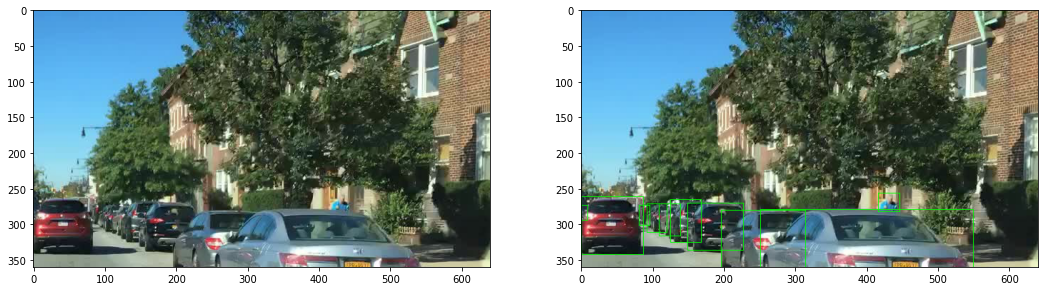

In [80]:
sub_img_name = sub_img_names[randint(0, len(sub_img_names))]

test_sub_img = plt.imread("./sub-images/" + sub_img_name + ".jpg")
annotation = file_lines_to_list("./sub-annotations/" + sub_img_name + ".txt")

dymmy = test_sub_img.copy()
for obj in annotation:
    rec_img = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)

print(test_sub_img.shape)
plt.figure(figsize = (18, 10))
plt.subplot(121), plt.imshow(test_sub_img)
plt.subplot(122), plt.imshow(dymmy)
plt.show()

In [81]:
annotation = file_lines_to_list("./sub-annotations/" + sub_img_name + ".txt")
annotation

[['car', '251', '279', '549', '360'],
 ['car', '0', '261', '87', '342'],
 ['car', '196', '280', '314', '360'],
 ['car', '149', '270', '227', '336'],
 ['car', '125', '265', '168', '325'],
 ['car', '109', '271', '139', '316'],
 ['car', '92', '271', '120', '311'],
 ['car', '81', '273', '96', '301'],
 ['car', '0', '273', '9', '294'],
 ['person', '416', '256', '446', '282']]

# Calculate Number of Objects

In [83]:
label_names = ["BACKGROUND", "train", "truck", "traffic_light", "traffic_sign",
               "rider", "person", "bus", "bike", "car", "motor"]

In [93]:
label_cnts = np.zeros(11)

for sub_anno in sub_txt_src:
    annotation = file_lines_to_list(sub_anno)
    
    for obj in annotation:
        for i in range(len(label_names)):
            if obj[0] == label_names[i]: label_cnts[i] += 1

In [95]:
for i in range(len(label_names)):
    print(label_names[i], int(label_cnts[i]))

BACKGROUND 0
train 45
truck 10904
traffic_light 53618
traffic_sign 57131
rider 3195
person 123302
bus 5132
bike 5686
car 181148
motor 1601


# Stack Sub Images

In [135]:
sub_img_src = glob.glob("./sub-images/*.jpg")
random.shuffle(sub_img_src)

sub_img_names = []

for sub_img in sub_img_src:

    sub_basename = os.path.basename(sub_img)
    sub_onlyname = os.path.splitext(sub_basename)

    sub_img_names.append(sub_onlyname[0])
    
print("Num of sub images:", len(sub_img_names))

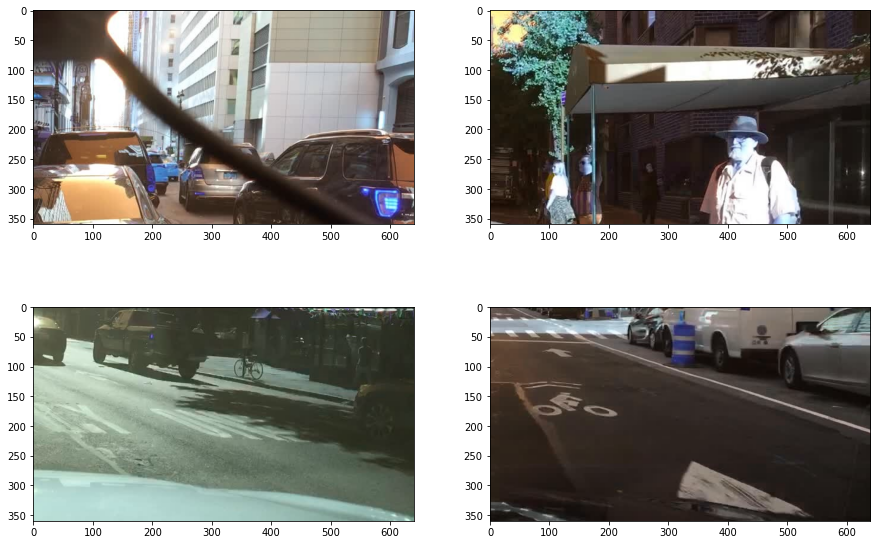

In [212]:
# for i in range(len(sub_img_src)):
for a in range(1):
    i = randint(0, 1000)
    top_left = cv2.imread(sub_img_src[4*i])
    top_right = cv2.imread(sub_img_src[4*i + 1])
    bot_left = cv2.imread(sub_img_src[4*i + 2])
    bot_right = cv2.imread(sub_img_src[4*i + 3])
    
plt.figure(figsize = (15, 10))
plt.subplot(221), plt.imshow(top_left)
plt.subplot(222), plt.imshow(top_right)
plt.subplot(223), plt.imshow(bot_left)
plt.subplot(224), plt.imshow(bot_right)
plt.show()

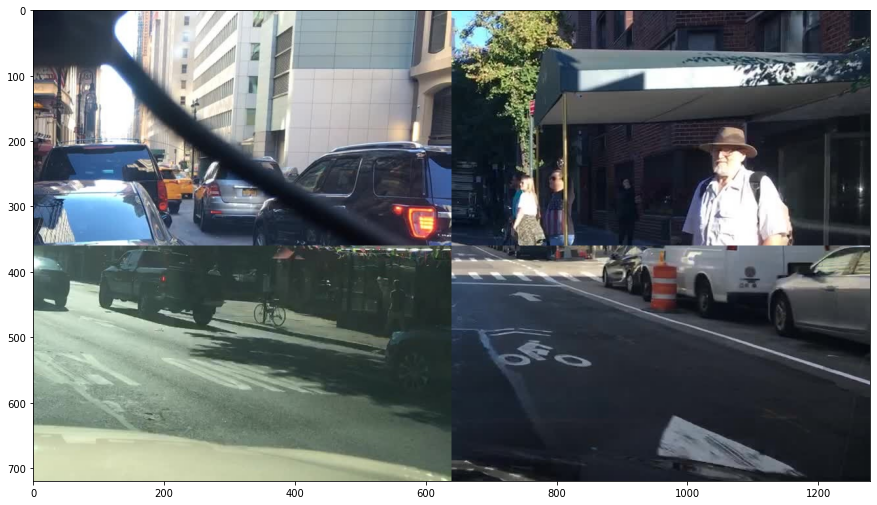

In [213]:
top = np.hstack((top_left, top_right))
bot = np.hstack((bot_left, bot_right))
full = np.vstack((top, bot))

plt.figure(figsize = (15, 10))
plt.imshow(cv2.cvtColor(full, cv2.COLOR_BGR2RGB))
plt.show()

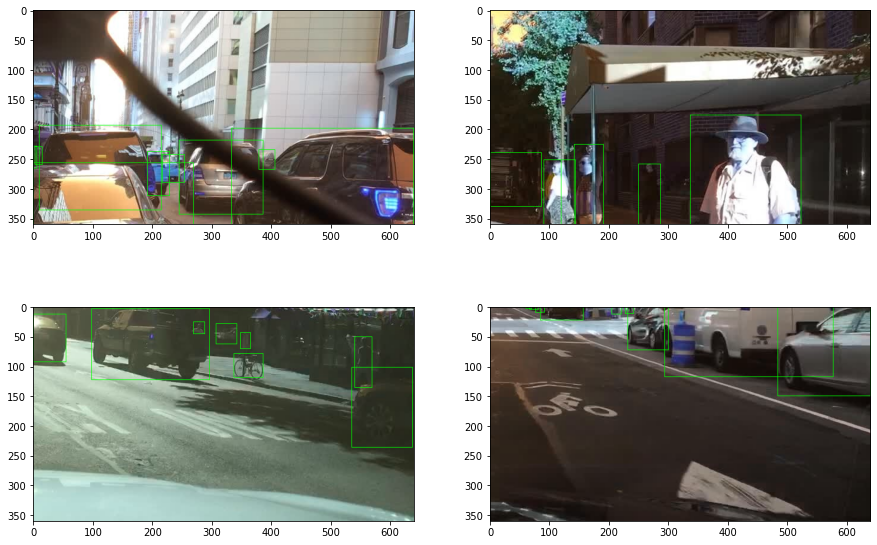

In [214]:
# for i in range(len(sub_img_src)):
for a in range(1):
#     i = randint(0, 1000)
    
    top_left = cv2.imread(sub_img_src[4*i])
    anno = file_lines_to_list("./sub-annotations/" + sub_img_names[4*i] + ".txt")
    dymmy = top_left.copy()
    for obj in anno:
        rec_tf = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)
    
    top_right = cv2.imread(sub_img_src[4*i + 1])
    anno = file_lines_to_list("./sub-annotations/" + sub_img_names[4*i + 1] + ".txt")
    dymmy = top_right.copy()
    for obj in anno:
        rec_tr = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)
    
    bot_left = cv2.imread(sub_img_src[4*i + 2])
    anno = file_lines_to_list("./sub-annotations/" + sub_img_names[4*i + 2] + ".txt")
    dymmy = bot_left.copy()
    for obj in anno:
        rec_bl = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)

    bot_right = cv2.imread(sub_img_src[4*i + 3])
    anno = file_lines_to_list("./sub-annotations/" + sub_img_names[4*i + 3] + ".txt")
    dymmy = bot_right.copy()
    for obj in anno:
        rec_br = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)
    
plt.figure(figsize = (15, 10))
plt.subplot(221), plt.imshow(rec_tf)
plt.subplot(222), plt.imshow(rec_tr)
plt.subplot(223), plt.imshow(rec_bl)
plt.subplot(224), plt.imshow(rec_br)
plt.show()

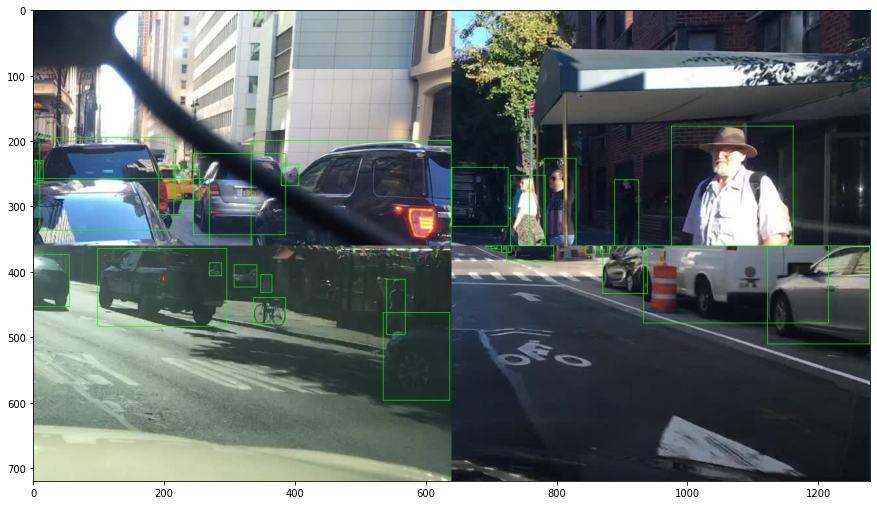

In [215]:
reg_top = np.hstack((rec_tf, rec_tr))
reg_bot = np.hstack((rec_bl, rec_br))
reg_full = np.vstack((reg_top, reg_bot))

plt.figure(figsize = (15, 10))
plt.imshow(cv2.cvtColor(reg_full, cv2.COLOR_BGR2RGB))
plt.show()

In [216]:
cv2.imwrite("full_1.jpg", full)
cv2.imwrite("reg_full_1.jpg", reg_full)

True

# Write XML Files

In [219]:
from pascal_voc_writer import Writer

In [230]:
name = sub_img_names[randint(0, 1000)]
info = file_lines_to_list("./sub-annotations/" + name + ".txt")
info

[['traffic_sign', '637', '187', '640', '204'],
 ['traffic_sign', '496', '210', '525', '220'],
 ['traffic_light', '78', '210', '102', '241'],
 ['traffic_light', '500', '230', '516', '249'],
 ['traffic_light', '516', '277', '536', '298'],
 ['car', '233', '335', '255', '360'],
 ['car', '202', '337', '235', '360'],
 ['car', '149', '333', '201', '360'],
 ['car', '2', '298', '156', '360'],
 ['truck', '301', '300', '358', '354'],
 ['car', '248', '315', '316', '360'],
 ['car', '374', '333', '399', '354'],
 ['person', '168', '333', '195', '360'],
 ['person', '415', '320', '431', '360'],
 ['person', '430', '317', '446', '360'],
 ['person', '444', '302', '485', '360'],
 ['person', '450', '310', '469', '360']]

In [233]:
writer = Writer(name, 1280, 720)

for inf in info:
    if inf[0] == "traffic_light": inf[0] = "traffic light"
    if inf[0] == "traffic_sign": inf[0] = "traffic sign"
    writer.addObject(inf[0], inf[1], inf[2], inf[3], inf[4])
    
writer.save(name + '.xml')

In [234]:
print(name)

a5715983-cdf6c729_0


# Create New Samples and XML Files

In [ ]:
def prettify(elem):
    """Return a pretty-printed XML string for the Element.
        """
    rough_string = ElementTree.tostring(elem, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="\t")

In [292]:
sub_img_src = glob.glob("./sub-images/*.jpg")
random.shuffle(sub_img_src)

sub_img_names = []

for sub_img in sub_img_src:

    sub_basename = os.path.basename(sub_img)
    sub_onlyname = os.path.splitext(sub_basename)

    sub_img_names.append(sub_onlyname[0])
    
print("Num of sub images:", len(sub_img_names))

Num of sub images: 42234


In [296]:
w_offset = 640
h_offset = 360

# for i in range(1):
for i in range(len(sub_img_src)//4):
    
    bbox = []
    
#     top_left = cv2.imread(sub_img_src[4*i])
    anno = file_lines_to_list("./sub-annotations/" + sub_img_names[4*i] + ".txt")
    for obj in anno:
        bbox.append(obj)
    
#     top_right = cv2.imread(sub_img_src[4*i + 1])
    anno = file_lines_to_list("./sub-annotations/" + sub_img_names[4*i + 1] + ".txt")
    for obj in anno:
        x1 = int(obj[1]) + w_offset
        x2 = int(obj[3]) + w_offset
        bbox.append([obj[0], x1, obj[2], x2, obj[4]])
    
#     bot_left = cv2.imread(sub_img_src[4*i + 2])
    anno = file_lines_to_list("./sub-annotations/" + sub_img_names[4*i + 2] + ".txt")
    for obj in anno:
        y1 = int(obj[2]) + h_offset
        y2 = int(obj[4]) + h_offset
        bbox.append([obj[0], obj[1], y1, obj[3], y2])
        
#     bot_right = cv2.imread(sub_img_src[4*i + 3])
    anno = file_lines_to_list("./sub-annotations/" + sub_img_names[4*i + 3] + ".txt")
    for obj in anno:
        x1 = int(obj[1]) + w_offset
        x2 = int(obj[3]) + w_offset
        y1 = int(obj[2]) + h_offset
        y2 = int(obj[4]) + h_offset
        bbox.append([obj[0], x1, y1, x2, y2])
    
#     top = np.hstack((top_left, top_right))
#     bot = np.hstack((bot_left, bot_right))
#     full = np.vstack((top, bot))
        
    bbox = np.array(bbox)  
    annotation = Element('annotation')
    
    for obj in bbox:
        if obj[0] == "traffic_light": obj[0] = "traffic light"
        if obj[0] == "traffic_sign": obj[0] = "traffic sign"
        
        SubElement(annotation, 'filename').text = sub_img_names[4*i] + "_stack.jpg"
        
        object_ = Element('object')
        SubElement(object_, 'name').text = obj[0]

        bndbox = Element('bndbox')
        SubElement(bndbox, 'xmin').text = obj[1]
        SubElement(bndbox, 'ymin').text = obj[2]
        SubElement(bndbox, 'xmax').text = obj[3]
        SubElement(bndbox, 'ymax').text = obj[4]

        object_.append(bndbox)

        annotation.append(object_)
        
    # Write Image
#     cv2.imwrite("./new_person_samples/" + sub_img_names[4*i] + "_stack.jpg", full)
    
    # Write XML
    with open(osp.join("./new_person_xml/" + sub_img_names[4*i] + "_stack.xml"), 'w') as f:
        f.write(prettify(annotation))

    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093


3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762


5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428


6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100


8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755


10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
1032

In [298]:
# Write Text
text_file = open("aug_data_names.txt", "w+")
for i in range(len(sub_img_src)//4):
    print(sub_img_names[4*i] + "_stack", file=text_file)
text_file.close()

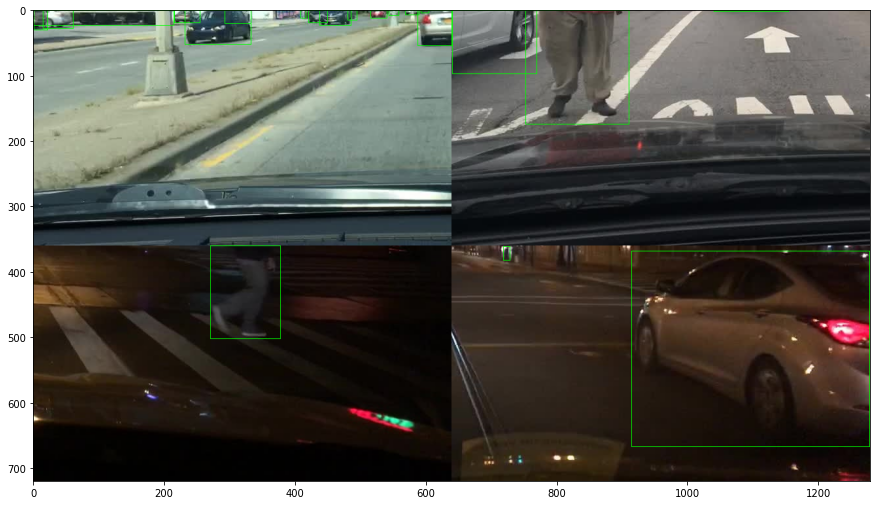

In [250]:
dymmy = full.copy()

for obj in bbox:
    rec = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)
    
plt.figure(figsize = (15, 10))
plt.imshow(cv2.cvtColor(rec, cv2.COLOR_BGR2RGB))
plt.show()

In [251]:
cv2.imwrite("rec.jpg", rec)

True

# Read Names

In [260]:
xml_src = glob.glob("./new_person_xml/*.xml")
# random.shuffle(sub_img_src)

xml_names = []

for xml in xml_src:

    xml_basename = os.path.basename(xml)
    xml_onlyname = os.path.splitext(xml_basename)

    xml_names.append(xml_onlyname[0])
    
print("Num of sub images:", len(xml_names))

Num of sub images: 10558


In [261]:
text_file = open("aug_data_names.txt", "w+")
for infor in xml_names: 
    print(infor, file=text_file)
text_file.close()

# Generate XML Files

In [262]:
import os
import os.path as osp

import json

from xml.etree.ElementTree import Element, SubElement
from xml.etree import ElementTree
from xml.dom import minidom

from PIL import Image

from tqdm import tqdm

In [263]:
name = sub_img_names[randint(0, 1000)]
info = file_lines_to_list("./sub-annotations/" + name + ".txt")
info

[['person', '367', '0', '422', '115'],
 ['person', '468', '0', '503', '75'],
 ['person', '70', '0', '140', '98'],
 ['person', '206', '0', '253', '84'],
 ['person', '237', '0', '311', '132'],
 ['person', '296', '0', '343', '25'],
 ['person', '416', '0', '453', '104'],
 ['person', '484', '0', '513', '48'],
 ['person', '445', '0', '456', '36']]

In [266]:
def prettify(elem):
    """Return a pretty-printed XML string for the Element.
        """
    rough_string = ElementTree.tostring(elem, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="\t")

In [ ]:
def generate_xml(info):
    annotation = Element('annotation')
    for obj in info:

        object_ = Element('object')
        SubElement(object_, 'name').text = obj[0]

        bndbox = Element('bndbox')
        SubElement(bndbox, 'xmin').text = obj[1]
        SubElement(bndbox, 'ymin').text = obj[2]
        SubElement(bndbox, 'xmax').text = obj[3]
        SubElement(bndbox, 'ymax').text = obj[4]

        object_.append(bndbox)

        annotation.append(object_)

    with open(osp.join("xml_filename.xml"), 'w') as f:
        f.write(prettify(annotation))
    # print(prettify(annotation))

In [278]:
annotation = Element('annotation')
for obj in info:

    object_ = Element('object')
    SubElement(object_, 'name').text = obj[0]
    
    bndbox = Element('bndbox')
    SubElement(bndbox, 'xmin').text = obj[1]
    SubElement(bndbox, 'ymin').text = obj[2]
    SubElement(bndbox, 'xmax').text = obj[3]
    SubElement(bndbox, 'ymax').text = obj[4]

    object_.append(bndbox)
    
    annotation.append(object_)

with open(osp.join("xml_filename.xml"), 'w') as f:
    f.write(prettify(annotation))